In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

**Chargement des dataset**

Les données de la Banque mondiale sont disponibles à l’adresse suivante :

https://datacatalog.worldbank.org/dataset/education-statistics

qui contient 5 jeux de données

In [2]:
dataC = pd.read_csv('EdStatsCountry.csv')
dataS = pd.read_csv('EdStatsSeries.csv')
dataCS = pd.read_csv('EdStatsCountry-Series.csv')
dataFN = pd.read_csv('EdStatsFootNote.csv') 
data = pd.read_csv('EdStatsData.csv') 

# 1- EdStatsCountry

In [3]:
# Contenu des 5 premières lignes
dataC.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


In [4]:
# Contenu des 5 derniers lignes
dataC.tail()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
236,XKX,Kosovo,Kosovo,Republic of Kosovo,NaN,Euro,"Kosovo became a World Bank member on June 29, ...",Europe & Central Asia,Lower middle income,KV,...,General Data Dissemination System (GDDS),2011,NaN,"Integrated household survey (IHS), 2011",NaN,NaN,NaN,NaN,NaN,NaN
237,YEM,Yemen,"Yemen, Rep.",Republic of Yemen,YE,Yemeni rial,Based on official government statistics and In...,Middle East & North Africa,Lower middle income,RY,...,General Data Dissemination System (GDDS),2004,"Demographic and Health Survey (DHS), 2013","Expenditure survey/budget survey (ES/BS), 2005",NaN,NaN,2006.0,2012.0,2005,NaN
238,ZAF,South Africa,South Africa,Republic of South Africa,ZA,South African rand,Fiscal year end: March 31; reporting period fo...,Sub-Saharan Africa,Upper middle income,ZA,...,Special Data Dissemination Standard (SDDS),2011,"Demographic and Health Survey (DHS), 2003; Wor...","Expenditure survey/budget survey (ES/BS), 2010",NaN,2007,2010.0,2012.0,2000,NaN
239,ZMB,Zambia,Zambia,Republic of Zambia,ZM,New Zambian kwacha,National accounts data have rebased to reflect...,Sub-Saharan Africa,Lower middle income,ZM,...,General Data Dissemination System (GDDS),2010,"Demographic and Health Survey (DHS), 2013","Integrated household survey (IHS), 2010",NaN,2010. Population and Housing Census.,NaN,2011.0,2002,NaN
240,ZWE,Zimbabwe,Zimbabwe,Republic of Zimbabwe,ZW,U.S. dollar,Fiscal year end: June 30; reporting period for...,Sub-Saharan Africa,Low income,ZW,...,General Data Dissemination System (GDDS),2012,"Demographic and Health Survey (DHS), 2010/11","Integrated household survey (IHS), 2011/12",NaN,NaN,NaN,2012.0,2002,NaN


In [5]:
# Le nombre de lignes et de colonnes
dataC.shape

(241, 32)

In [6]:
# Nom des colonnes
dataC.columns

Index(['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code',
       'Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code',
       'National accounts base year', 'National accounts reference year',
       'SNA price valuation', 'Lending category', 'Other groups',
       'System of National Accounts', 'Alternative conversion factor',
       'PPP survey year', 'Balance of Payments Manual in use',
       'External debt Reporting status', 'System of trade',
       'Government Accounting concept', 'IMF data dissemination standard',
       'Latest population census', 'Latest household survey',
       'Source of most recent Income and expenditure data',
       'Vital registration complete', 'Latest agricultural census',
       'Latest industrial data', 'Latest trade data',
       'Latest water withdrawal data', 'Unnamed: 31'],
      dtype='object')

In [7]:
# Le type de données
dataC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                                       214 non-null    object 
 9   WB-2 code 

In [8]:
# Doublons
dataC.duplicated().sum()

0

In [9]:
print(f'le pourcentage des valeures manquantes dans le dataframe dataC est {(dataC.isnull().sum().sum()/(dataC.shape[0] * dataC.shape[1])*100).round(2)}%')

le pourcentage des valeures manquantes dans le dataframe dataC est 30.52%


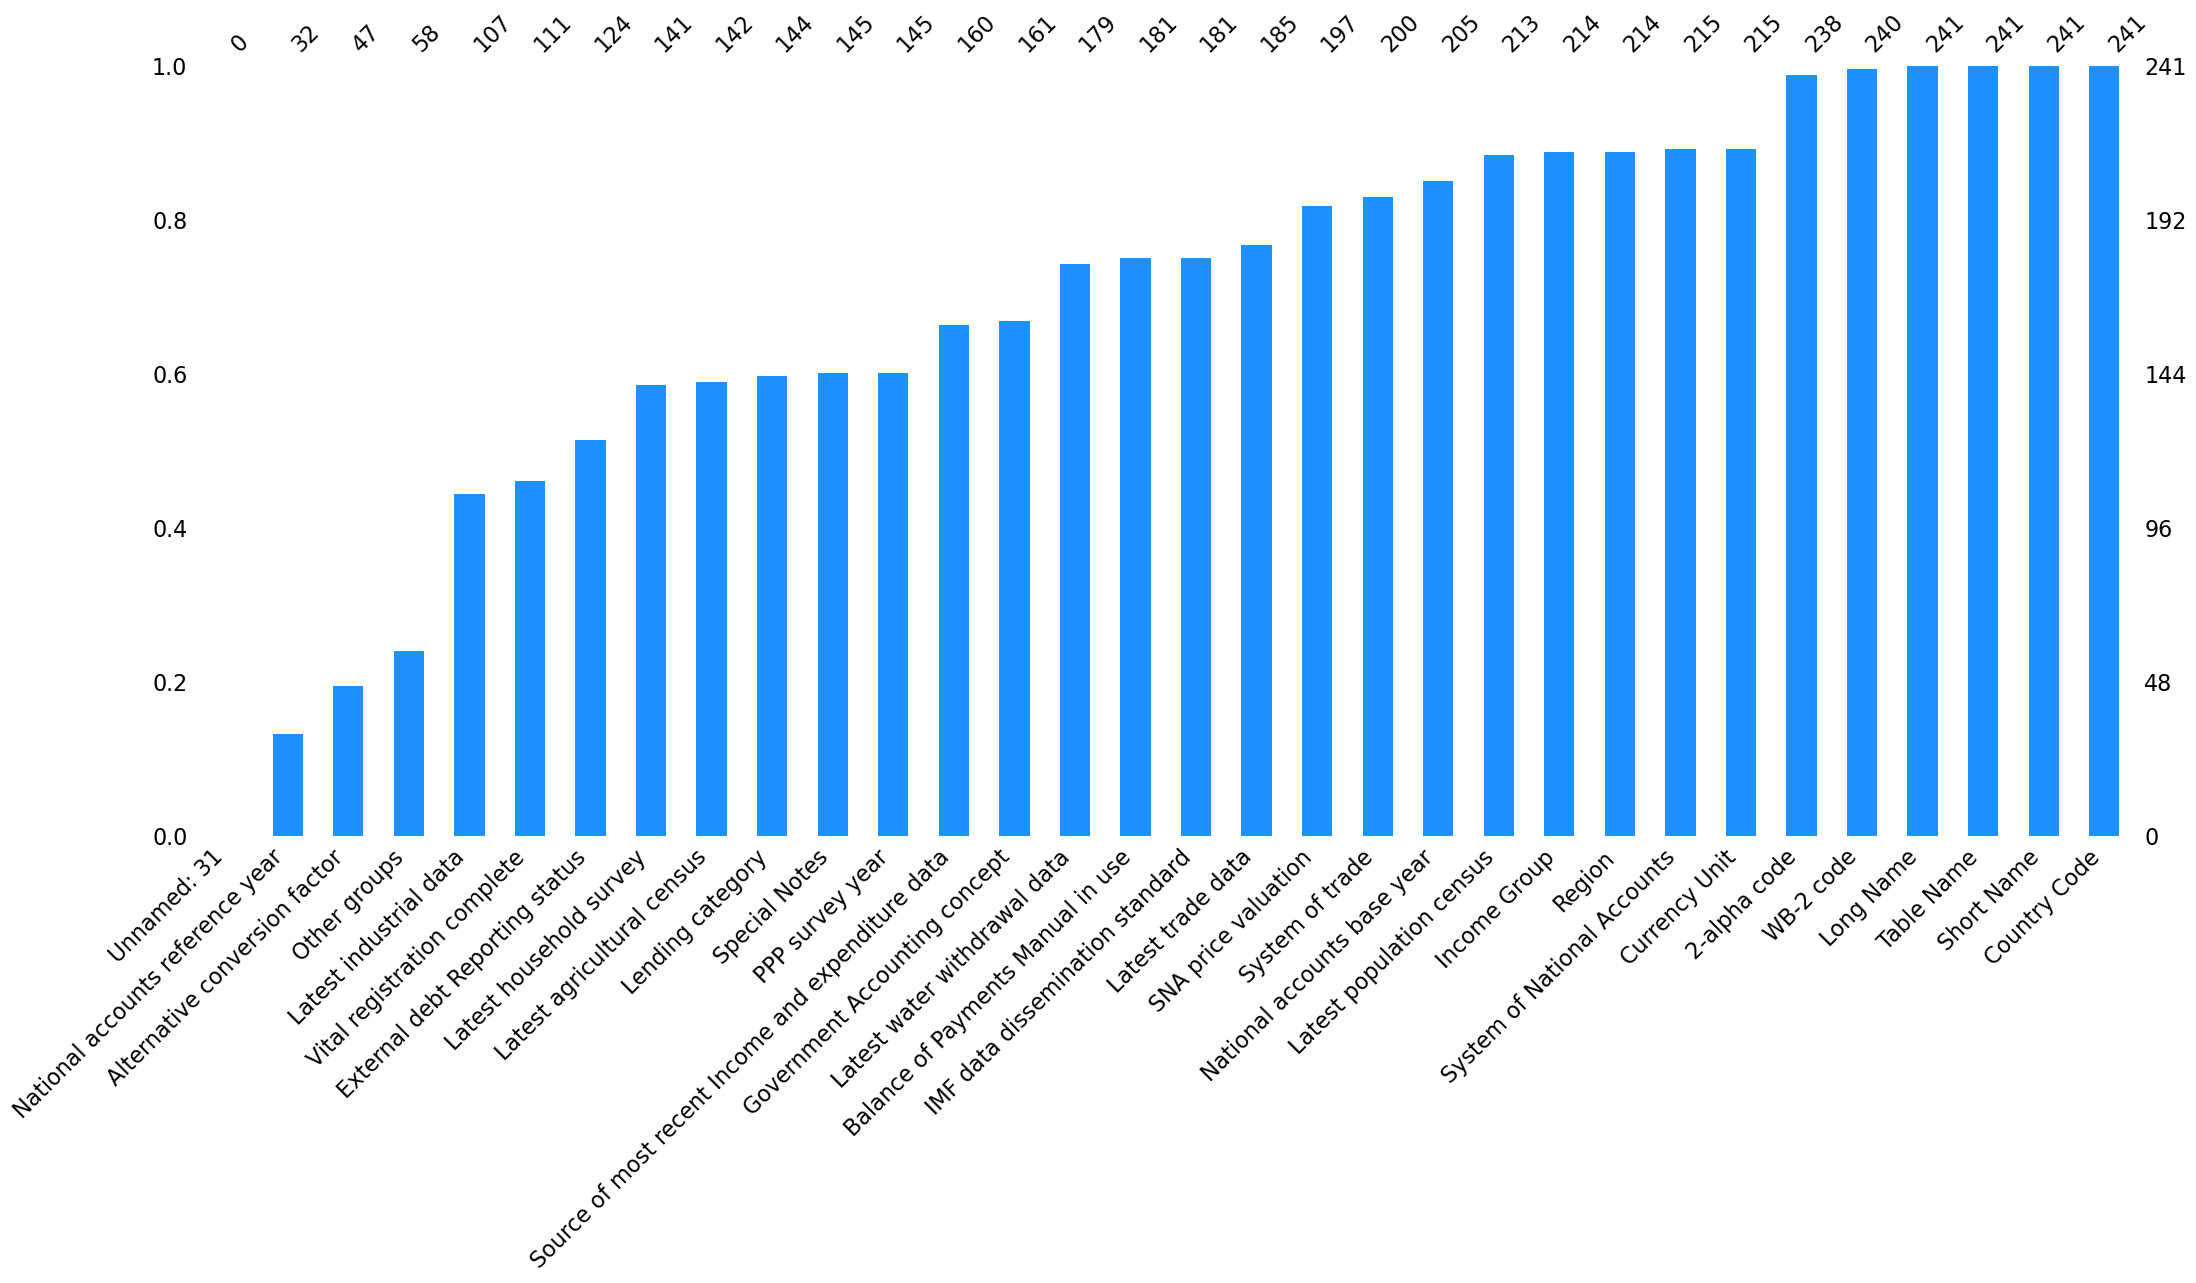

In [10]:
# 'Missingno': Donne un graphique à barres des valeurs manquantes 
msno.bar(dataC,color="dodgerblue", sort="ascending" );

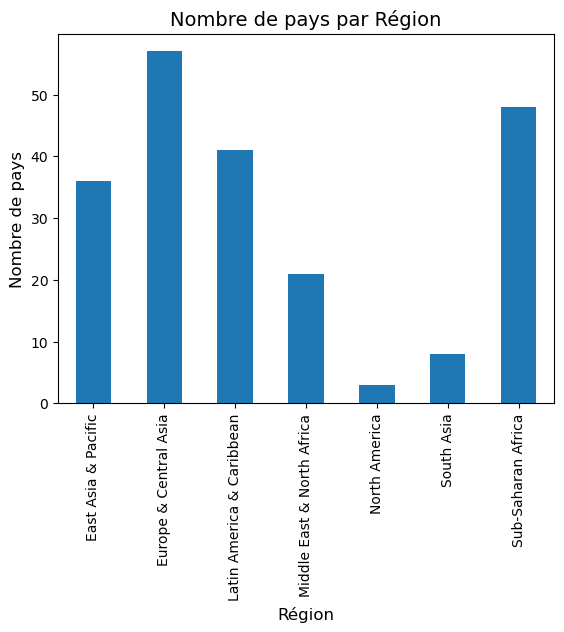

In [11]:
# Regroupement des pays par régions
dataC.groupby('Region')['Short Name'].count().plot(kind='bar')
plt.xlabel('Région', fontsize=12)
plt.ylabel('Nombre de pays', fontsize=12)
plt.title('Nombre de pays par Région', fontsize=14);

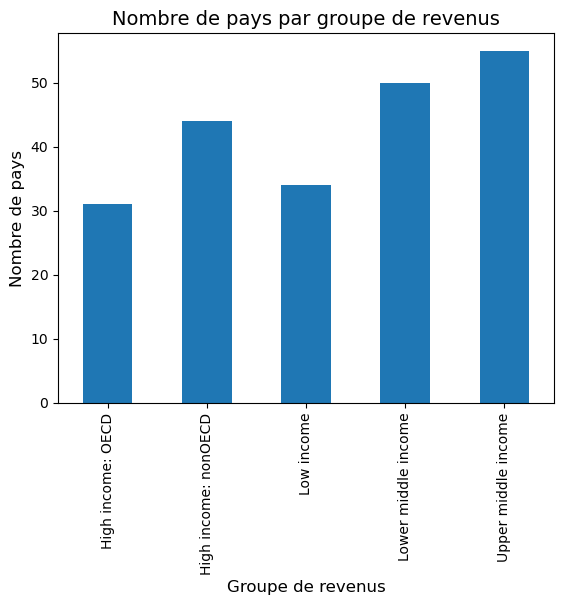

In [12]:
# Regroupement des pays par groupe de revenus
dataC.groupby('Income Group')['Short Name'].count().plot(kind='bar')
plt.xlabel('Groupe de revenus', fontsize=12)
plt.ylabel('Nombre de pays', fontsize=12)
plt.title('Nombre de pays par groupe de revenus', fontsize=14);

# 2- EdStatsCountry-Series

In [13]:
# Contenu des 5 premières lignes
dataCS.head(5)

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


In [14]:
# Contenu des 5 derniers lignes
dataC.tail(5)

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
236,XKX,Kosovo,Kosovo,Republic of Kosovo,NaN,Euro,"Kosovo became a World Bank member on June 29, ...",Europe & Central Asia,Lower middle income,KV,...,General Data Dissemination System (GDDS),2011,NaN,"Integrated household survey (IHS), 2011",NaN,NaN,NaN,NaN,NaN,NaN
237,YEM,Yemen,"Yemen, Rep.",Republic of Yemen,YE,Yemeni rial,Based on official government statistics and In...,Middle East & North Africa,Lower middle income,RY,...,General Data Dissemination System (GDDS),2004,"Demographic and Health Survey (DHS), 2013","Expenditure survey/budget survey (ES/BS), 2005",NaN,NaN,2006.0,2012.0,2005,NaN
238,ZAF,South Africa,South Africa,Republic of South Africa,ZA,South African rand,Fiscal year end: March 31; reporting period fo...,Sub-Saharan Africa,Upper middle income,ZA,...,Special Data Dissemination Standard (SDDS),2011,"Demographic and Health Survey (DHS), 2003; Wor...","Expenditure survey/budget survey (ES/BS), 2010",NaN,2007,2010.0,2012.0,2000,NaN
239,ZMB,Zambia,Zambia,Republic of Zambia,ZM,New Zambian kwacha,National accounts data have rebased to reflect...,Sub-Saharan Africa,Lower middle income,ZM,...,General Data Dissemination System (GDDS),2010,"Demographic and Health Survey (DHS), 2013","Integrated household survey (IHS), 2010",NaN,2010. Population and Housing Census.,NaN,2011.0,2002,NaN
240,ZWE,Zimbabwe,Zimbabwe,Republic of Zimbabwe,ZW,U.S. dollar,Fiscal year end: June 30; reporting period for...,Sub-Saharan Africa,Low income,ZW,...,General Data Dissemination System (GDDS),2012,"Demographic and Health Survey (DHS), 2010/11","Integrated household survey (IHS), 2011/12",NaN,NaN,NaN,2012.0,2002,NaN


In [15]:
# Le nombre de lignes et de colonnes
dataCS.shape

(613, 4)

In [16]:
# Le type de données
dataCS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CountryCode  613 non-null    object 
 1   SeriesCode   613 non-null    object 
 2   DESCRIPTION  613 non-null    object 
 3   Unnamed: 3   0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 19.3+ KB


In [17]:
# Doublons
dataCS.duplicated().sum()

0

In [18]:
# Le % des valeurs manquantes
print(f'le pourcentage des valeures manquantes dans le dataframe dataCS est {(dataCS.isnull().sum().sum()/(dataCS.shape[0] * dataCS.shape[1])*100)}%')

le pourcentage des valeures manquantes dans le dataframe dataCS est 25.0%


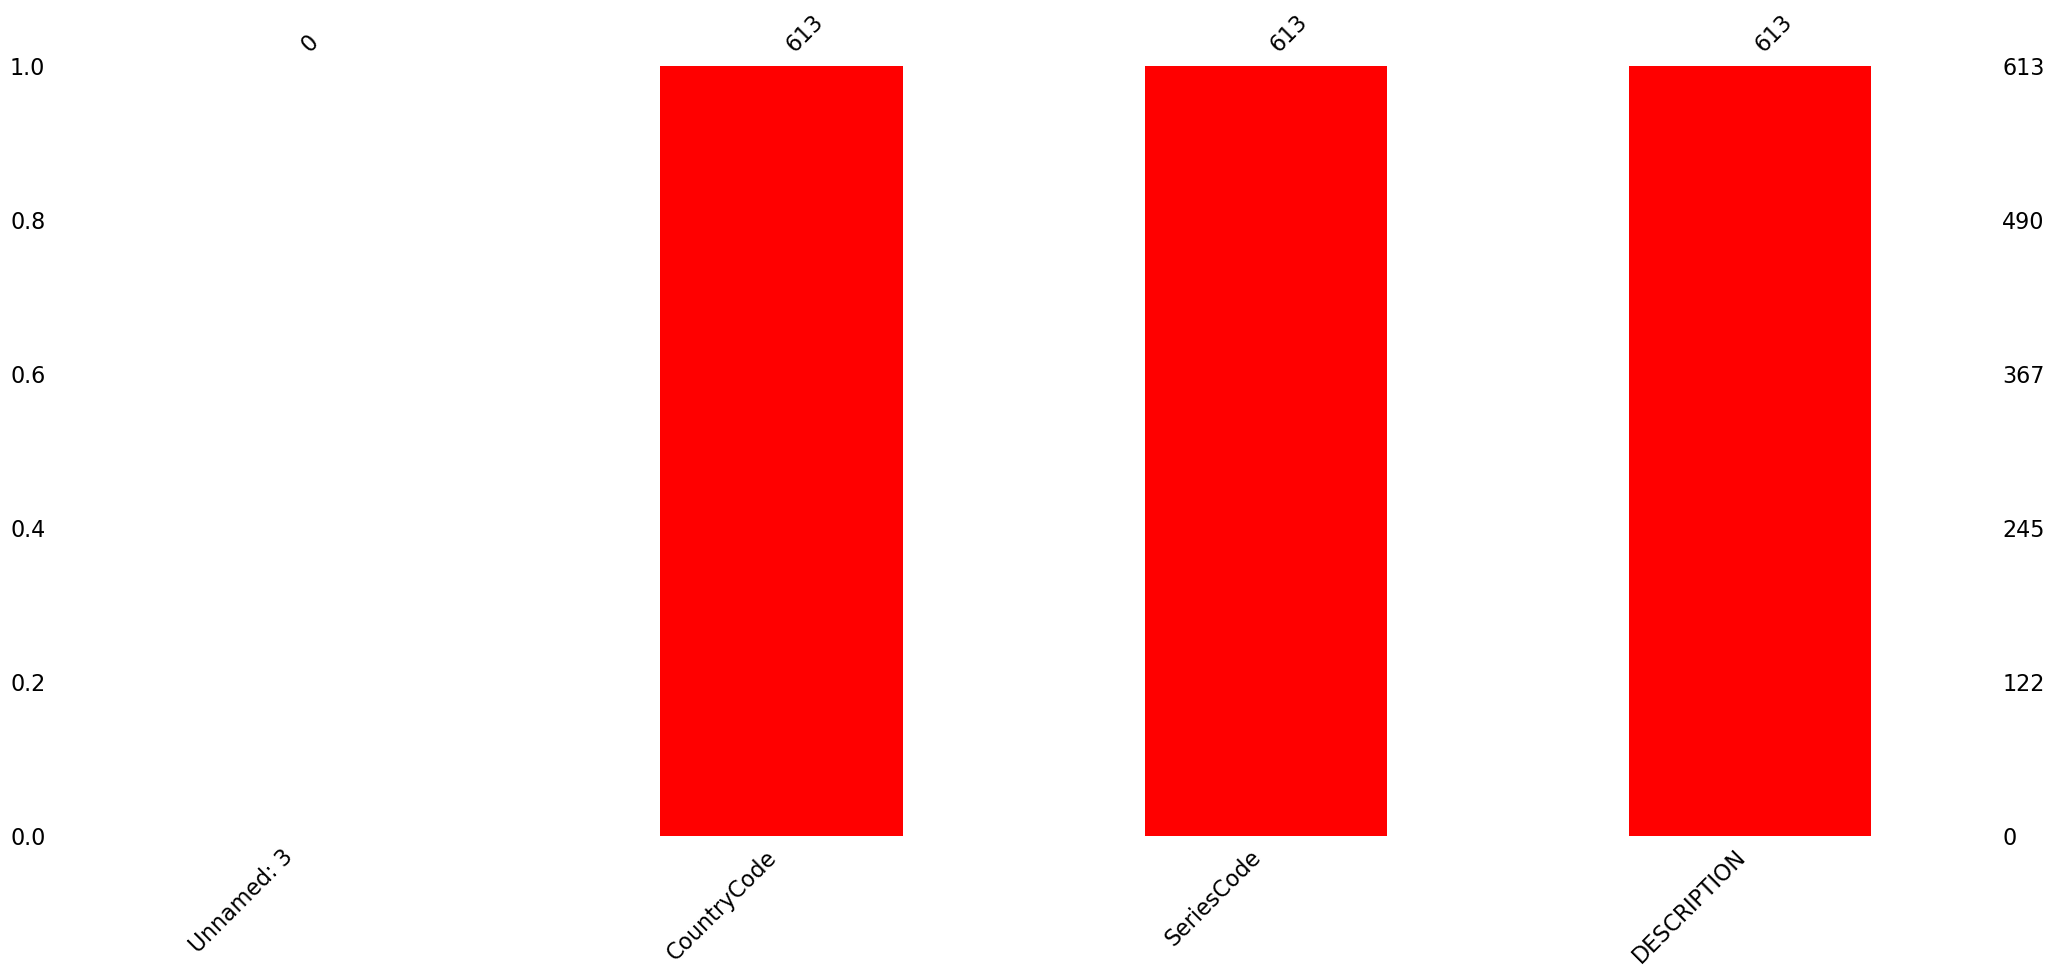

In [19]:
# 'Missingno': Donne un graphique à barres des valeurs manquantes 
msno.bar(dataCS,color="red", sort="ascending" );

In [20]:
# Recherche des noms des pays n'apparaissant pas dans le jeu de données EdStatsCountry-Series.csv
dataC[~dataC['Country Code'].isin(dataCS['CountryCode'])]

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
5,ARB,Arab World,Arab World,Arab World,1A,NaN,Arab World aggregate. Arab World is composed o...,NaN,NaN,1A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,CUW,Curaçao,Curaçao,Curaçao,CW,Netherlands Antilles guilder,NaN,Latin America & Caribbean,High income: nonOECD,CW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,EAP,East Asia & Pacific (developing only),East Asia & Pacific,East Asia & Pacific (developing only),4E,NaN,East Asia and Pacific regional aggregate (does...,NaN,NaN,4E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,EAS,East Asia & Pacific (all income levels),East Asia & Pacific (all income levels),East Asia & Pacific (all income levels),Z4,NaN,East Asia and Pacific regional aggregate (incl...,NaN,NaN,Z4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,ECA,Europe & Central Asia (developing only),Europe & Central Asia,Europe & Central Asia (developing only),7E,NaN,Europe and Central Asia regional aggregate (do...,NaN,NaN,7E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,ECS,Europe & Central Asia (all income levels),Europe & Central Asia (all income levels),Europe & Central Asia (all income levels),Z7,NaN,Europe and Central Asia regional aggregate (in...,NaN,NaN,Z7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,EMU,Euro area,Euro area,Euro area,XC,NaN,Euro area aggregate.,NaN,NaN,XC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,EUU,European Union,European Union,European Union,EU,NaN,European Union aggregate.,NaN,NaN,EU,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,HIC,High income,High income,High income,XD,NaN,High income group aggregate. High-income econo...,NaN,NaN,XD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,HPC,Heavily indebted poor countries (HIPC),Heavily indebted poor countries (HIPC),Heavily indebted poor countries (HIPC),XE,NaN,Heavily indebted poor countries aggregate.,NaN,NaN,XE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Les pays en plus dans le jeu de données EdStatsCountry.csv sont : 

*des noms de région,regroupement de pays: European Union, Arab World.., 

*des noms de regroupement de revenus: OECD members..., 

*des pays: Curaçao , Nauru... 

# 3- EdStatsFootNote

In [21]:
dataFN.head(5)

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN


In [22]:
dataFN.shape

(643638, 5)

In [23]:
dataFN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643638 entries, 0 to 643637
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CountryCode  643638 non-null  object 
 1   SeriesCode   643638 non-null  object 
 2   Year         643638 non-null  object 
 3   DESCRIPTION  643638 non-null  object 
 4   Unnamed: 4   0 non-null       float64
dtypes: float64(1), object(4)
memory usage: 24.6+ MB


In [24]:
# Recherche des noms des pays n'apparaissant pas dans le jeu de données EdStatsCountry-Series.csv
dataC[~dataC['Country Code'].isin(dataFN['CountryCode'])]

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
85,GRL,Greenland,Greenland,Greenland,GL,Danish krone,NaN,Europe & Central Asia,High income: nonOECD,GL,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
134,MAF,St. Martin (French part),St. Martin (French part),St. Martin (French part),MF,Euro,NaN,Latin America & Caribbean,High income: nonOECD,MF,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
207,SXM,Sint Maarten (Dutch part),Sint Maarten (Dutch part),Sint Maarten (Dutch part),SX,Netherlands Antilles guilder,NaN,Latin America & Caribbean,High income: nonOECD,SX,...,NaN,2011,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN


Les pays non présents dans le jeu de données EdStatsFootNote.csv mais présents dans le jeu de données EdStatsCountry-Series.csv sont :

*Saint Martin

*Groenland

*Sint Maarten

# 4- EdStatsSeries

In [25]:
dataS.head()

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
dataS.tail()

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
3660,UIS.XUNIT.USCONST.3.FSGOV,Expenditures,Government expenditure per upper secondary stu...,NaN,"Average total (current, capital and transfers)...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3661,UIS.XUNIT.USCONST.4.FSGOV,Expenditures,Government expenditure per post-secondary non-...,NaN,"Average total (current, capital and transfers)...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3662,UIS.XUNIT.USCONST.56.FSGOV,Expenditures,Government expenditure per tertiary student (c...,NaN,"Average total (current, capital and transfers)...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3663,XGDP.23.FSGOV.FDINSTADM.FFD,Expenditures,Government expenditure in secondary institutio...,"Total general (local, regional and central) go...","Total general (local, regional and central) go...",NaN,NaN,NaN,Secondary,NaN,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3664,XGDP.56.FSGOV.FDINSTADM.FFD,Expenditures,Government expenditure in tertiary institution...,"Total general (local, regional and central) go...","Total general (local, regional and central) go...",NaN,NaN,NaN,Tertiary,NaN,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
dataS.shape

(3665, 21)

In [28]:
dataS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Series Code                          3665 non-null   object 
 1   Topic                                3665 non-null   object 
 2   Indicator Name                       3665 non-null   object 
 3   Short definition                     2156 non-null   object 
 4   Long definition                      3665 non-null   object 
 5   Unit of measure                      0 non-null      float64
 6   Periodicity                          99 non-null     object 
 7   Base Period                          314 non-null    object 
 8   Other notes                          552 non-null    object 
 9   Aggregation method                   47 non-null     object 
 10  Limitations and exceptions           14 non-null     object 
 11  Notes from original source    

In [29]:
# % valeurs manquantes
print(f'le pourcentage des valeures manquantes dans le dataframe dataS est {(dataS.isnull().sum().sum()/(dataS.shape[0] * dataS.shape[1])*100).round(2)}%')


le pourcentage des valeures manquantes dans le dataframe dataS est 71.72%


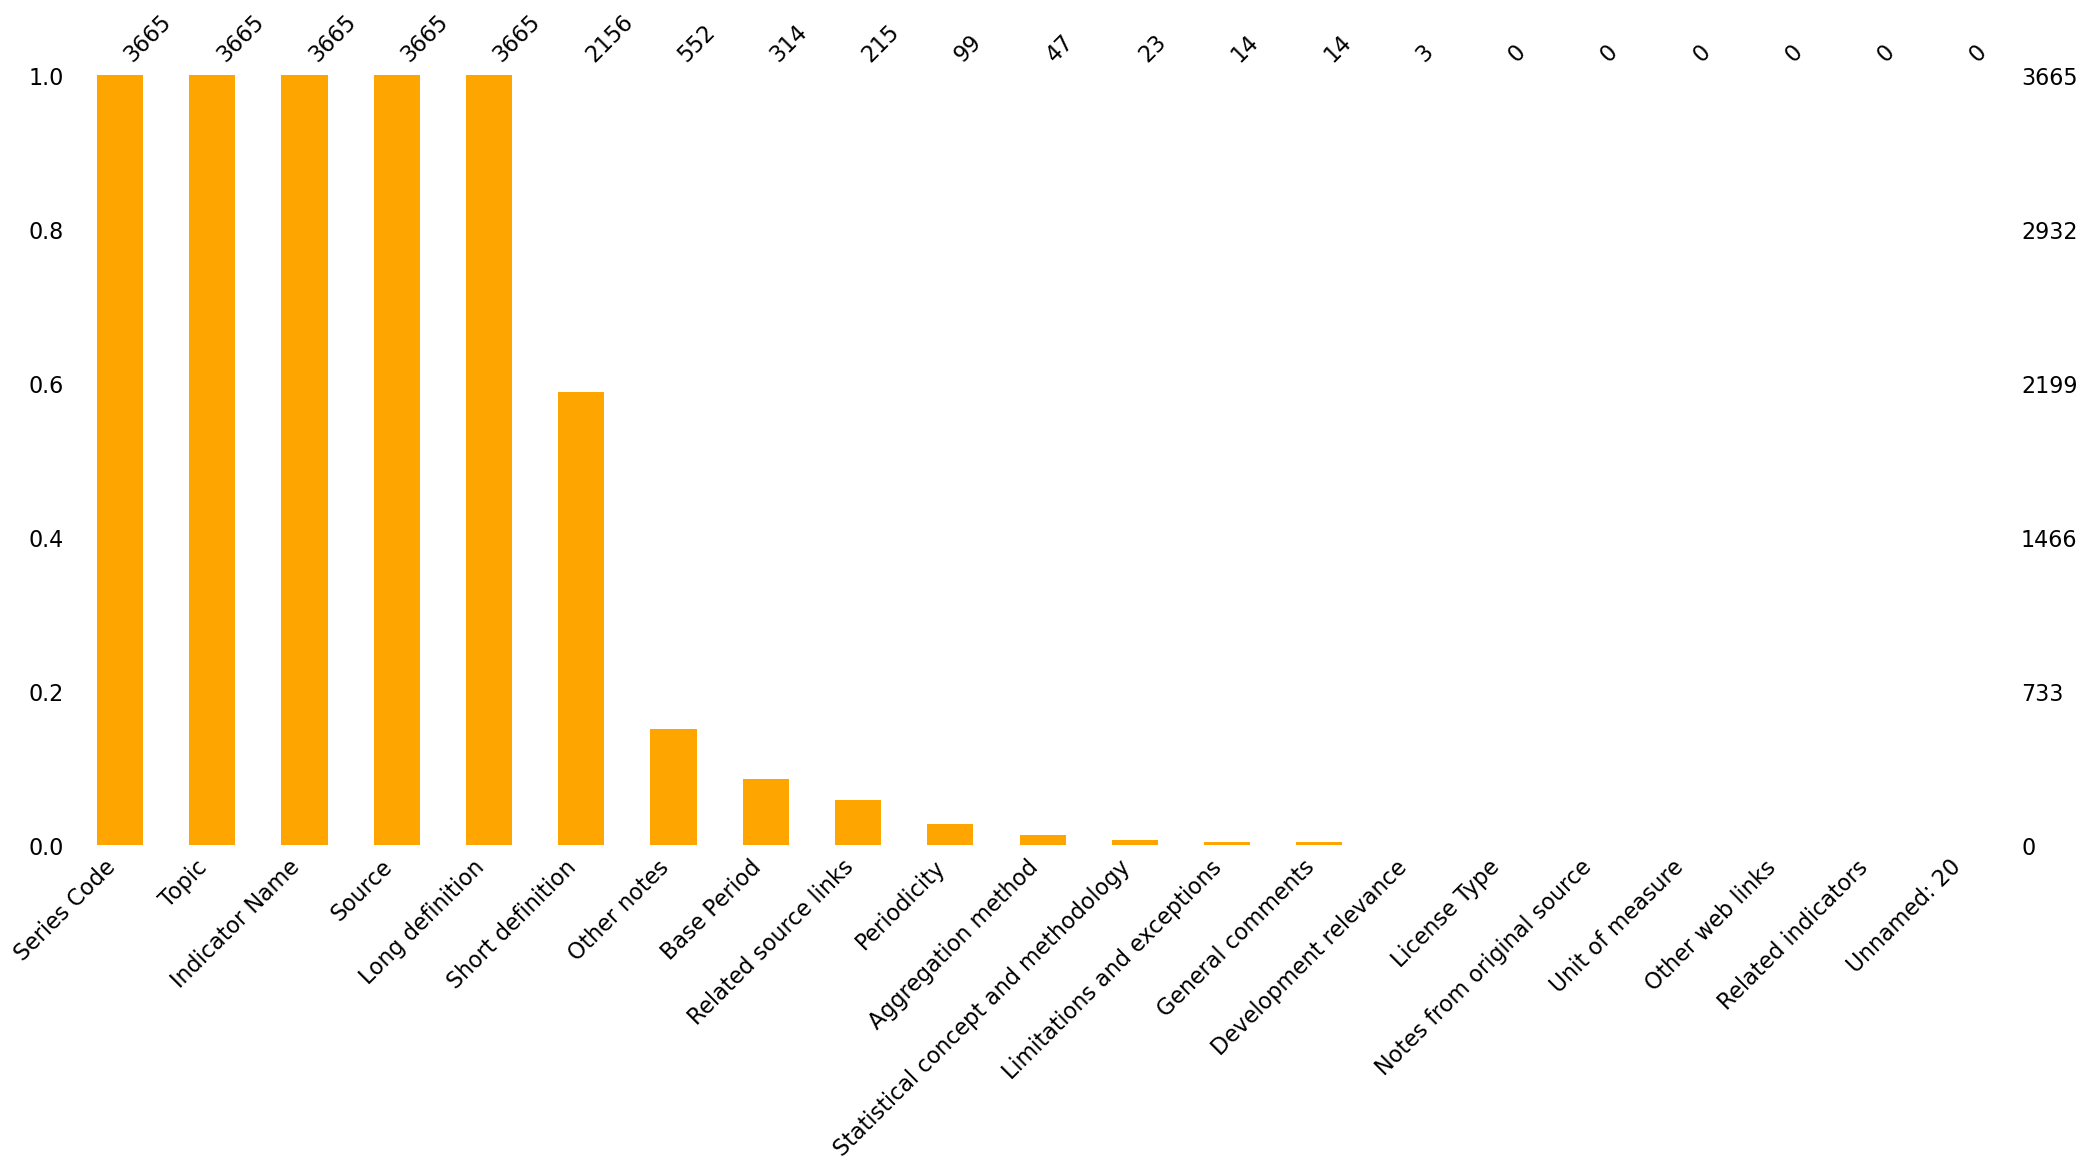

In [30]:
msno.bar(dataS,color="orange", sort="descending" );

In [31]:
dataS.duplicated().sum()

0

In [32]:
dataS['Series Code']

0               BAR.NOED.1519.FE.ZS
1                  BAR.NOED.1519.ZS
2               BAR.NOED.15UP.FE.ZS
3                  BAR.NOED.15UP.ZS
4               BAR.NOED.2024.FE.ZS
                   ...             
3660      UIS.XUNIT.USCONST.3.FSGOV
3661      UIS.XUNIT.USCONST.4.FSGOV
3662     UIS.XUNIT.USCONST.56.FSGOV
3663    XGDP.23.FSGOV.FDINSTADM.FFD
3664    XGDP.56.FSGOV.FDINSTADM.FFD
Name: Series Code, Length: 3665, dtype: object

Il y a : 3665 indicateurs par pays

In [33]:
dataS['Initial']=dataS['Series Code'].str.split('.').str[0]
dataS['Initial'].unique()

array(['BAR', 'HH', 'IT', 'LO', 'NY', 'OECD', 'PRJ', 'SABER', 'SE', 'SH',
       'SL', 'SP', 'UIS', 'XGDP'], dtype=object)

In [34]:
dataS['Indcount']=dataS['Series Code'].count()
dataS['Indcount']

0       3665
1       3665
2       3665
3       3665
4       3665
        ... 
3660    3665
3661    3665
3662    3665
3663    3665
3664    3665
Name: Indcount, Length: 3665, dtype: int64

In [35]:

dataS.groupby('Initial')['Series Code'].count()

Initial
BAR       360
HH        250
IT          2
LO       1046
NY         12
OECD       16
PRJ       308
SABER     215
SE        173
SH          2
SL         17
SP        215
UIS      1047
XGDP        2
Name: Series Code, dtype: int64

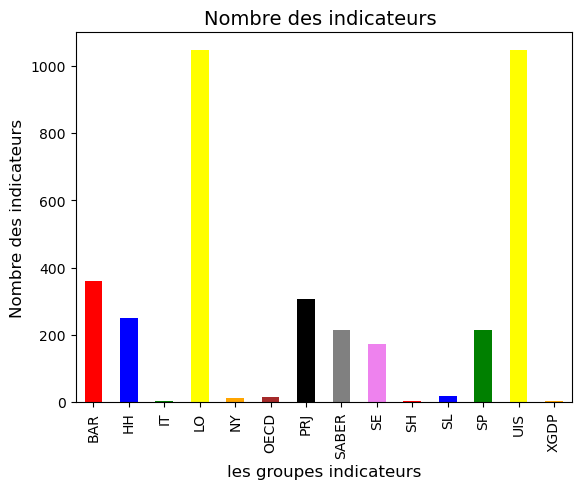

In [36]:
dataS.groupby('Initial')['Series Code'].count().plot(kind='bar', color=['red','blue','Green','yellow','Orange','Brown','black', 'Gray', 'violet'])
plt.xlabel('les groupes indicateurs', fontsize=12)
plt.ylabel('Nombre des indicateurs', fontsize=12)
plt.title('Nombre des indicateurs ', fontsize=14);

Les groups d'indicateurs
Nous distinguons 14 groupes d'indicateurs les suivants:

**UIS** : Unesco Institute for Statistics

**LO** : Learning Outcomes

**BAR** : Indicateurs barro-lee, (niveaux d'éducation)

**PRJ** : Projections Wittgenstein (durée de scolarisation, populations..)

**HH** : regroupe DHS (Demographic and Health Surveys) et MICS (Multiple Indicator Cluster Surveys)

**SABER** : System Approach for Better Education

**SP** : Social Population

**SE** : Social Education

**SL** : Social Labor

**OECD** : OCDE, salaires des enseignants du secteur public

**NY** : National Accounts, produits intérieurs et nationaux

**IT** : Infrastructure : utilisateurs internet et ordinateurs

**SH** : Social Health

**XGDP** : Dépenses publiques dans l'éducation

Pour notre étude, nous nous intéressons aux groupes suivants : IT, NY, SE, SP

# 5- EdStatsData.csv

In [37]:
data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
data.tail()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
886925,Zimbabwe,ZWE,"Youth illiterate population, 15-24 years, male...",UIS.LP.AG15T24.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886926,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886927,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, f...",SE.ADT.1524.LT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886928,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, g...",SE.ADT.1524.LT.FM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886929,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, m...",SE.ADT.1524.LT.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
pd.options.display.max_columns = 100
data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,60.999962,61.92268,62.69342,64.383186,65.617767,66.085152,66.608139,67.290451,68.510094,69.033211,69.944908,71.04187,71.693779,71.699097,71.995819,72.602837,70.032722,70.464821,72.645683,71.81176,73.903511,74.425201,75.110817,76.254318,77.245682,78.800522,80.051399,80.805389,81.607063,82.489487,82.685509,83.280342,84.011871,84.195961,85.211998,85.24514,86.101669,85.51194,85.320152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
data.shape

(886930, 70)

Le fichier data comporte 886930 lignes et 70 colonnes

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

In [42]:
data.index

RangeIndex(start=0, stop=886930, step=1)

In [43]:
data.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],
      dtype='object')

In [44]:
data.duplicated().sum()

0

In [45]:
data.isnull().sum()

Country Name           0
Country Code           0
Indicator Name         0
Indicator Code         0
1970              814642
                   ...  
2085              835494
2090              835494
2095              835494
2100              835494
Unnamed: 69       886930
Length: 70, dtype: int64

In [46]:
print(f'le pourcentage des valeures manquantes dans le dataframe data est {(data.isnull().sum().sum()/(data.shape[0] * data.shape[1])*100).round(2)}%')

le pourcentage des valeures manquantes dans le dataframe data est 86.1%


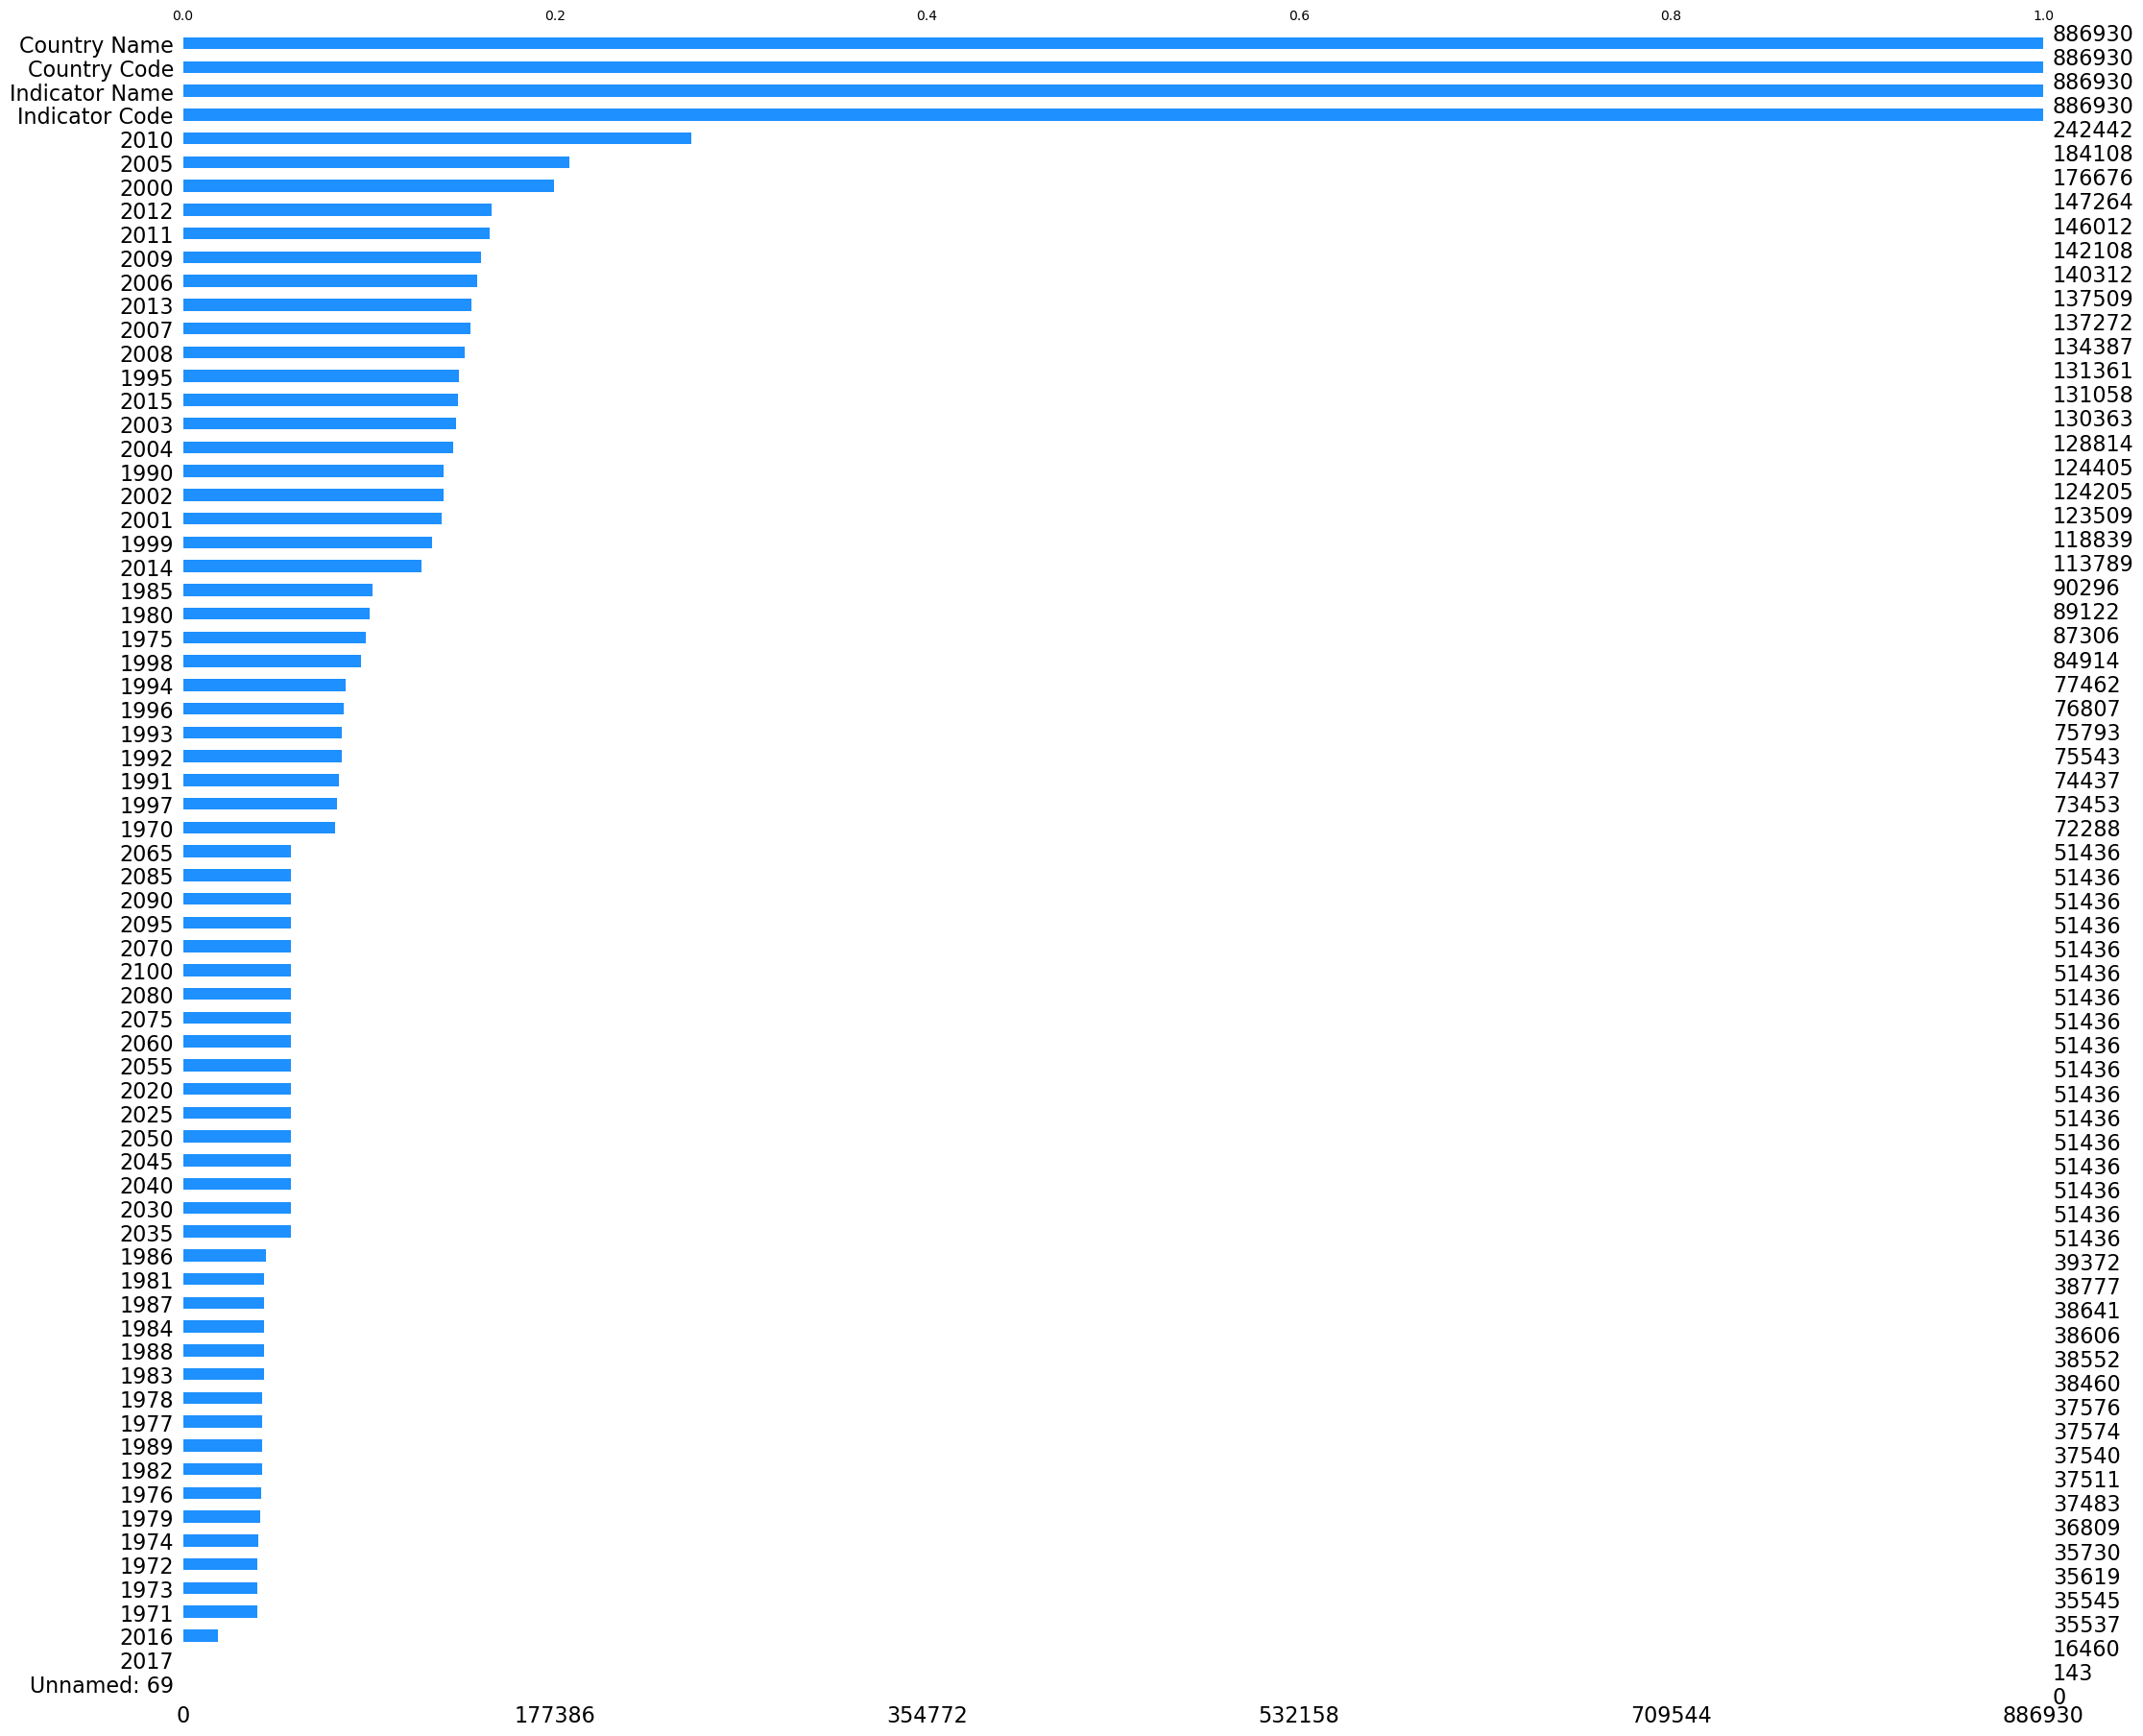

In [47]:
msno.bar(data,color="dodgerblue", sort="ascending" );

### Utilisation des fichier
Après une première analyse, nous décidons de n'utiliser que **EdStatsData** pour un table de travail principale et les deux fichiers **EdStatsCountry** et **EdStatsSeries** comme des tables d'informations

# Data Cleaning du dataframe 'data'

## 1- Nous allons créer une dataframe qui contient les informations à moins de 90% de valeurs manquantes. 

In [48]:
dataD=data.copy()
dataD=data.drop(data.columns[data.isnull().mean()*100>90], axis=1)
dataD

,Country Name,Country Code,Indicator Name,Indicator Code,1980,1985,1990,1995,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,65.617767,69.033211,71.995819,71.81176,76.254318,77.245682,78.800522,80.051399,80.805389,81.607063,82.489487,82.685509,83.280342,84.011871,84.195961,85.211998,85.24514,86.101669,85.51194,85.320152,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886925,Zimbabwe,ZWE,"Youth illiterate population, 15-24 years, male...",UIS.LP.AG15T24.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,166679.00000,NaN,NaN,199464.000000,NaN
886926,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.93070,NaN,NaN,90.428120,NaN
886927,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, f...",SE.ADT.1524.LT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.12456,NaN,NaN,93.188350,NaN
886928,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, g...",SE.ADT.1524.LT.FM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.02828,NaN,NaN,1.063890,NaN


## 2- suppression des régions 

In [49]:
regions=['ARB' , 'EAS' , 'EAP' , 'EMU' , 'ECS' , 'ECA' , 'EUU' , 'HPC' , 'HIC' , 'LCN' , 'LAC' , 'LDC' , 'LMY' , 'LIC' , 'LMC' , 'MNA' , 'MEA', 'MIC' , 'NAC' , 'OED' , 'SAS' , 'SSF' , 'SSA' , 'UMC' , 'WLD']
new_dataD=dataD.loc[~dataD['Country Code'].isin(regions)]
new_dataD

,Country Name,Country Code,Indicator Name,Indicator Code,1980,1985,1990,1995,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
91625,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.059870,NaN,NaN,NaN,NaN,NaN,47.436790,50.627232,NaN
91626,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.223100,NaN,NaN,NaN,NaN,NaN,34.073261,37.641541,NaN
91627,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.379130,NaN,NaN,NaN,NaN,NaN,0.567060,0.598370,NaN
91628,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.152851,NaN,NaN,NaN,NaN,NaN,60.087059,62.906952,NaN
91629,Afghanistan,AFG,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886925,Zimbabwe,ZWE,"Youth illiterate population, 15-24 years, male...",UIS.LP.AG15T24.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,166679.00000,NaN,NaN,199464.000000,NaN
886926,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.93070,NaN,NaN,90.428120,NaN
886927,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, f...",SE.ADT.1524.LT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.12456,NaN,NaN,93.188350,NaN
886928,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, g...",SE.ADT.1524.LT.FM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.02828,NaN,NaN,1.063890,NaN


## Choix des indicateurs

L'entreprise fournisant du contenu de formation en ligne, les utilisateurs doivent disposer d'un ordinateur et d'un accès à internet.

Le public visé étant de niveau lycée à université, nous devrons définir par pays quelle est le nombre d'étudiant à ce niveau de formation. Nous devrons également définir le taux d'étudiants parmis la population cible. De cette façon nous pourrons identifier les personnes étant susceptible de faire appelle à Academy pour leurs formations. Ces personnes ont entre 15 et 24 ans.

Il faut aussi que les personnes soient en capacités de payer le contenu de formation. Il est donc important de prendre en compte le facteur economique du pays comme le PIB qui donne une imformation sur le niveau de vie d'un pays.

Pour finir nous devons repondre à la question de l'évolution du potentiel de client dans les années à venir. Pour cela nous pouvons soit prendre en compte la croissance de population dans le pays.


les différents groupes d'indicateur à étudier sont :

- **IT** : Infrastructure

- **SE** : Social Education

- **SP** : Social Population

- **NY** : National Accounts, produits intérieurs et nationaux

les mots clés à rechercher:

- **15** : pour la cible de la population des 15-19 ans
- **20** : pour la cible de la population des 20-24 ans
- **SEC** : pour les regroupements par lycéens
- **TER** : pour les regroupements par étudiants de l'enseignement supérieur
- **IT** : pour l'accès aux infrastructures techniques
- **TOT** : pour population total

In [50]:
dataS[dataS['Series Code'].str.startswith('SP.') & dataS['Series Code'].str.contains('TER|SEC|15|20|TOT')]


,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20,Initial,Indcount
2450,SP.POP.1015.FE.UN,Population,"Population, ages 10-15, female","Population, ages 10-15, female is the total nu...","Population, ages 10-15, female is the total nu...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics (Derived),NaN,NaN,NaN,NaN,NaN,NaN,NaN,SP,3665
2451,SP.POP.1015.MA.UN,Population,"Population, ages 10-15, male","Population, ages 10-15, male is the total numb...","Population, ages 10-15, male is the total numb...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics (Derived),NaN,NaN,NaN,NaN,NaN,NaN,NaN,SP,3665
2452,SP.POP.1015.TO.UN,Population,"Population, ages 10-15, total","Population, ages 10-15, total is the total pop...","Population, ages 10-15, total is the total pop...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics (Derived),NaN,NaN,NaN,NaN,NaN,NaN,NaN,SP,3665
2462,SP.POP.1115.FE.UN,Population,"Population, ages 11-15, female","Population, ages 11-15, female is the total nu...","Population, ages 11-15, female is the total nu...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics (Derived),NaN,NaN,NaN,NaN,NaN,NaN,NaN,SP,3665
2463,SP.POP.1115.MA.UN,Population,"Population, ages 11-15, male","Population, ages 11-15, male is the total numb...","Population, ages 11-15, male is the total numb...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics (Derived),NaN,NaN,NaN,NaN,NaN,NaN,NaN,SP,3665
2464,SP.POP.1115.TO.UN,Population,"Population, ages 11-15, total","Population, ages 11-15, total is the total pop...","Population, ages 11-15, total is the total pop...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics (Derived),NaN,NaN,NaN,NaN,NaN,NaN,NaN,SP,3665
2474,SP.POP.1215.FE.UN,Population,"Population, ages 12-15, female","Population, ages 12-15, female is the total nu...","Population, ages 12-15, female is the total nu...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics (Derived),NaN,NaN,NaN,NaN,NaN,NaN,NaN,SP,3665
2475,SP.POP.1215.MA.UN,Population,"Population, ages 12-15, male","Population, ages 12-15, male is the total numb...","Population, ages 12-15, male is the total numb...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics (Derived),NaN,NaN,NaN,NaN,NaN,NaN,NaN,SP,3665
2476,SP.POP.1215.TO.UN,Population,"Population, ages 12-15, total","Population, ages 12-15, total is the total pop...","Population, ages 12-15, total is the total pop...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics (Derived),NaN,NaN,NaN,NaN,NaN,NaN,NaN,SP,3665
2504,SP.POP.1524.FE.UN,Population,"Population, ages 15-24, female","Population, ages 15-24, female is the total nu...","Population, ages 15-24, female is the total nu...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics (Derived),NaN,NaN,NaN,NaN,NaN,NaN,NaN,SP,3665


SP.POP.TOTL

SP.POP.1524.TO.UN


In [51]:
pd.options.display.max_rows = None
dataS[dataS['Series Code'].str.startswith('SE.') & dataS['Series Code'].str.contains('TER|SEC|15|20|TOT')]

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20,Initial,Indcount
2209,SE.ADT.1524.LT.FE.ZS,Literacy,"Youth literacy rate, population 15-24 years, f...",NaN,Number of females age 15 to 24 years who can b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SE,3665
2210,SE.ADT.1524.LT.FM.ZS,Literacy,"Youth literacy rate, population 15-24 years, g...",NaN,Ratio of female youth literacy rate to male yo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SE,3665
2211,SE.ADT.1524.LT.MA.ZS,Literacy,"Youth literacy rate, population 15-24 years, m...",NaN,Number of males age 15 to 24 years who can bot...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SE,3665
2212,SE.ADT.1524.LT.ZS,Literacy,"Youth literacy rate, population 15-24 years, b...",NaN,Number of people age 15 to 24 years who can bo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SE,3665
2219,SE.ENR.SECO.FM.ZS,Secondary,"Gross enrolment ratio, secondary, gender parit...",NaN,Ratio of female gross enrolment ratio for seco...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SE,3665
2220,SE.ENR.TERT.FM.ZS,Tertiary,"Gross enrolment ratio, tertiary, gender parity...",NaN,Ratio of female gross enrolment ratio for tert...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SE,3665
2287,SE.SEC.AGES,Secondary,Official entrance age to lower secondary educa...,NaN,Age at which students would enter lower second...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SE,3665
2288,SE.SEC.CMPT.LO.FE.ZS,Secondary,"Lower secondary completion rate, female (%)",NaN,Total number of new female entrants in the las...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SE,3665
2289,SE.SEC.CMPT.LO.MA.ZS,Secondary,"Lower secondary completion rate, male (%)",NaN,Total number of new male entrants in the last ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SE,3665
2290,SE.SEC.CMPT.LO.ZS,Secondary,"Lower secondary completion rate, both sexes (%)",NaN,Total number of new entrants in the last grade...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SE,3665


SE.SEC.ENRR

SE.TER.ENRR

In [52]:
dataS[dataS['Series Code'].str.startswith('NY.') ]

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20,Initial,Indcount
1658,NY.GDP.MKTP.CD,Economic Policy & Debt: National accounts: US$...,GDP (current US$),NaN,GDP at purchaser's prices is the sum of gross ...,NaN,Annual,NaN,NaN,Gap-filled total,"Gross domestic product (GDP), though widely tr...",NaN,NaN,"World Bank national accounts data, and OECD Na...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NY,3665
1659,NY.GDP.MKTP.KD,Economic Policy & Debt: National accounts: US$...,GDP (constant 2010 US$),NaN,GDP at purchaser's prices is the sum of gross ...,NaN,Annual,2010,NaN,Gap-filled total,Each industry's contribution to growth in the ...,NaN,NaN,"World Bank national accounts data, and OECD Na...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NY,3665
1660,NY.GDP.MKTP.PP.CD,Economic Policy & Debt: Purchasing power parity,"GDP, PPP (current international $)",NaN,PPP GDP is gross domestic product converted to...,NaN,Annual,NaN,NaN,Gap-filled total,NaN,NaN,NaN,"World Bank, International Comparison Program d...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NY,3665
1661,NY.GDP.MKTP.PP.KD,Economic Policy & Debt: Purchasing power parity,"GDP, PPP (constant 2011 international $)",NaN,PPP GDP is gross domestic product converted to...,NaN,Annual,2011,NaN,Gap-filled total,NaN,NaN,NaN,"World Bank, International Comparison Program d...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NY,3665
1662,NY.GDP.PCAP.CD,Economic Policy & Debt: National accounts: US$...,GDP per capita (current US$),NaN,GDP per capita is gross domestic product divid...,NaN,Annual,NaN,NaN,Weighted average,NaN,NaN,NaN,"World Bank national accounts data, and OECD Na...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NY,3665
1663,NY.GDP.PCAP.KD,Economic Policy & Debt: National accounts: US$...,GDP per capita (constant 2010 US$),NaN,GDP per capita is gross domestic product divid...,NaN,Annual,2010,NaN,Weighted average,NaN,NaN,NaN,"World Bank national accounts data, and OECD Na...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NY,3665
1664,NY.GDP.PCAP.PP.CD,Economic Policy & Debt: Purchasing power parity,"GDP per capita, PPP (current international $)",NaN,GDP per capita based on purchasing power parit...,NaN,Annual,NaN,NaN,Weighted average,NaN,NaN,NaN,"World Bank, International Comparison Program d...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NY,3665
1665,NY.GDP.PCAP.PP.KD,Economic Policy & Debt: Purchasing power parity,"GDP per capita, PPP (constant 2011 internation...",NaN,GDP per capita based on purchasing power parit...,NaN,Annual,2011,NaN,Weighted average,NaN,NaN,NaN,"World Bank, International Comparison Program d...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NY,3665
1666,NY.GNP.MKTP.CD,Economic Policy & Debt: National accounts: US$...,GNI (current US$),NaN,GNI (formerly GNP) is the sum of value added b...,NaN,Annual,NaN,NaN,Gap-filled total,NaN,NaN,NaN,"World Bank national accounts data, and OECD Na...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NY,3665
1667,NY.GNP.MKTP.PP.CD,Economic Policy & Debt: Purchasing power parity,"GNI, PPP (current international $)",NaN,PPP GNI (formerly PPP GNP) is gross national i...,NaN,Annual,NaN,NaN,Gap-filled total,NaN,NaN,NaN,"World Bank, International Comparison Program d...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NY,3665


NY.GNP.PCAP.PP.CD

In [53]:
dataS[dataS['Series Code'].str.startswith('IT.') ]

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20,Initial,Indcount
610,IT.CMP.PCMP.P2,Infrastructure: Communications,Personal computers (per 100 people),NaN,Personal computers are self-contained computer...,NaN,Annual,NaN,NaN,Weighted average,NaN,NaN,Restricted use: Please cite the International ...,"International Telecommunication Union, World T...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,IT,3665
611,IT.NET.USER.P2,Infrastructure: Communications,Internet users (per 100 people),NaN,Internet users are individuals who have used t...,NaN,Annual,NaN,NaN,Weighted average,Operators have traditionally been the main sou...,NaN,Please cite the International Telecommunicatio...,"International Telecommunication Union, World T...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,IT,3665


IT.NET.USER.P2

## Bilan : indicateurs retenus

**numérique**

IT.NET.USER.P2

**économique**

NY.GNP.PCAP.PP.CD

**démographique**

SP.POP.1524.TO.UN

SP.POP.TOTL

**éducatif**

SE.SEC.ENRR

SE.TER.ENRR

In [54]:
dataDInd = new_dataD.loc[new_dataD["Indicator Code"].isin(['SP.POP.TOTL','NY.GDP.PCAP.PP.CD', 'IT.NET.USER.P2', 'SP.POP.1524.TO.UN', 'SE.SEC.ENRR', 'SE.TER.ENRR'])]
dataDInd.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1980,1985,1990,1995,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
92872,Afghanistan,AFG,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.755176e+02,9.228294e+02,9.163345e+02,1.011596e+03,1.065620e+03,1.210479e+03,1.247066e+03,1.482099e+03,1.581601e+03,1.660740e+03,1.873154e+03,1.877412e+03,1.875447e+03,1.864974e+03
92960,Afghanistan,AFG,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,16.942141,13.46313,1.122283e+01,2.256602e+01,NaN,NaN,1.304874e+01,NaN,1.331708e+01,1.866479e+01,1.978370e+01,2.993046e+01,3.008316e+01,4.022338e+01,4.673276e+01,5.324683e+01,5.461618e+01,5.667734e+01,5.668866e+01,5.565616e+01,5.564441e+01
92964,Afghanistan,AFG,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,NaN,NaN,2.273170e+00,NaN,NaN,NaN,NaN,NaN,1.256840e+00,1.256030e+00,NaN,NaN,NaN,NaN,3.903390e+00,NaN,3.755980e+00,NaN,NaN,8.662800e+00,NaN
93000,Afghanistan,AFG,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,0.000000e+00,NaN,NaN,NaN,4.722568e-03,4.561395e-03,8.789125e-02,1.058090e-01,1.224148e+00,2.107124e+00,1.900000e+00,1.840000e+00,3.550000e+00,4.000000e+00,5.000000e+00,5.454545e+00,5.900000e+00,7.000000e+00,8.260000e+00
94107,Afghanistan,AFG,"Population, ages 15-24, total",SP.POP.1524.TO.UN,NaN,NaN,2.423555e+06,3.483752e+06,3870496.0,3979438.0,4.122669e+06,4.293057e+06,4.486256e+06,4.694142e+06,4.910340e+06,5.134377e+06,5.367499e+06,5.606736e+06,5.848604e+06,6.090239e+06,6.330684e+06,6.569239e+06,6.803785e+06,7.032072e+06,7.252785e+06


In [55]:
dataDInd.shape

(1302, 25)

In [56]:
dataDInd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 92872 to 885798
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    1302 non-null   object 
 1   Country Code    1302 non-null   object 
 2   Indicator Name  1302 non-null   object 
 3   Indicator Code  1302 non-null   object 
 4   1980            461 non-null    float64
 5   1985            457 non-null    float64
 6   1990            1010 non-null   float64
 7   1995            933 non-null    float64
 8   1999            1057 non-null   float64
 9   2000            1048 non-null   float64
 10  2001            1059 non-null   float64
 11  2002            1074 non-null   float64
 12  2003            1063 non-null   float64
 13  2004            1076 non-null   float64
 14  2005            1072 non-null   float64
 15  2006            1060 non-null   float64
 16  2007            1065 non-null   float64
 17  2008            1062 non-nu

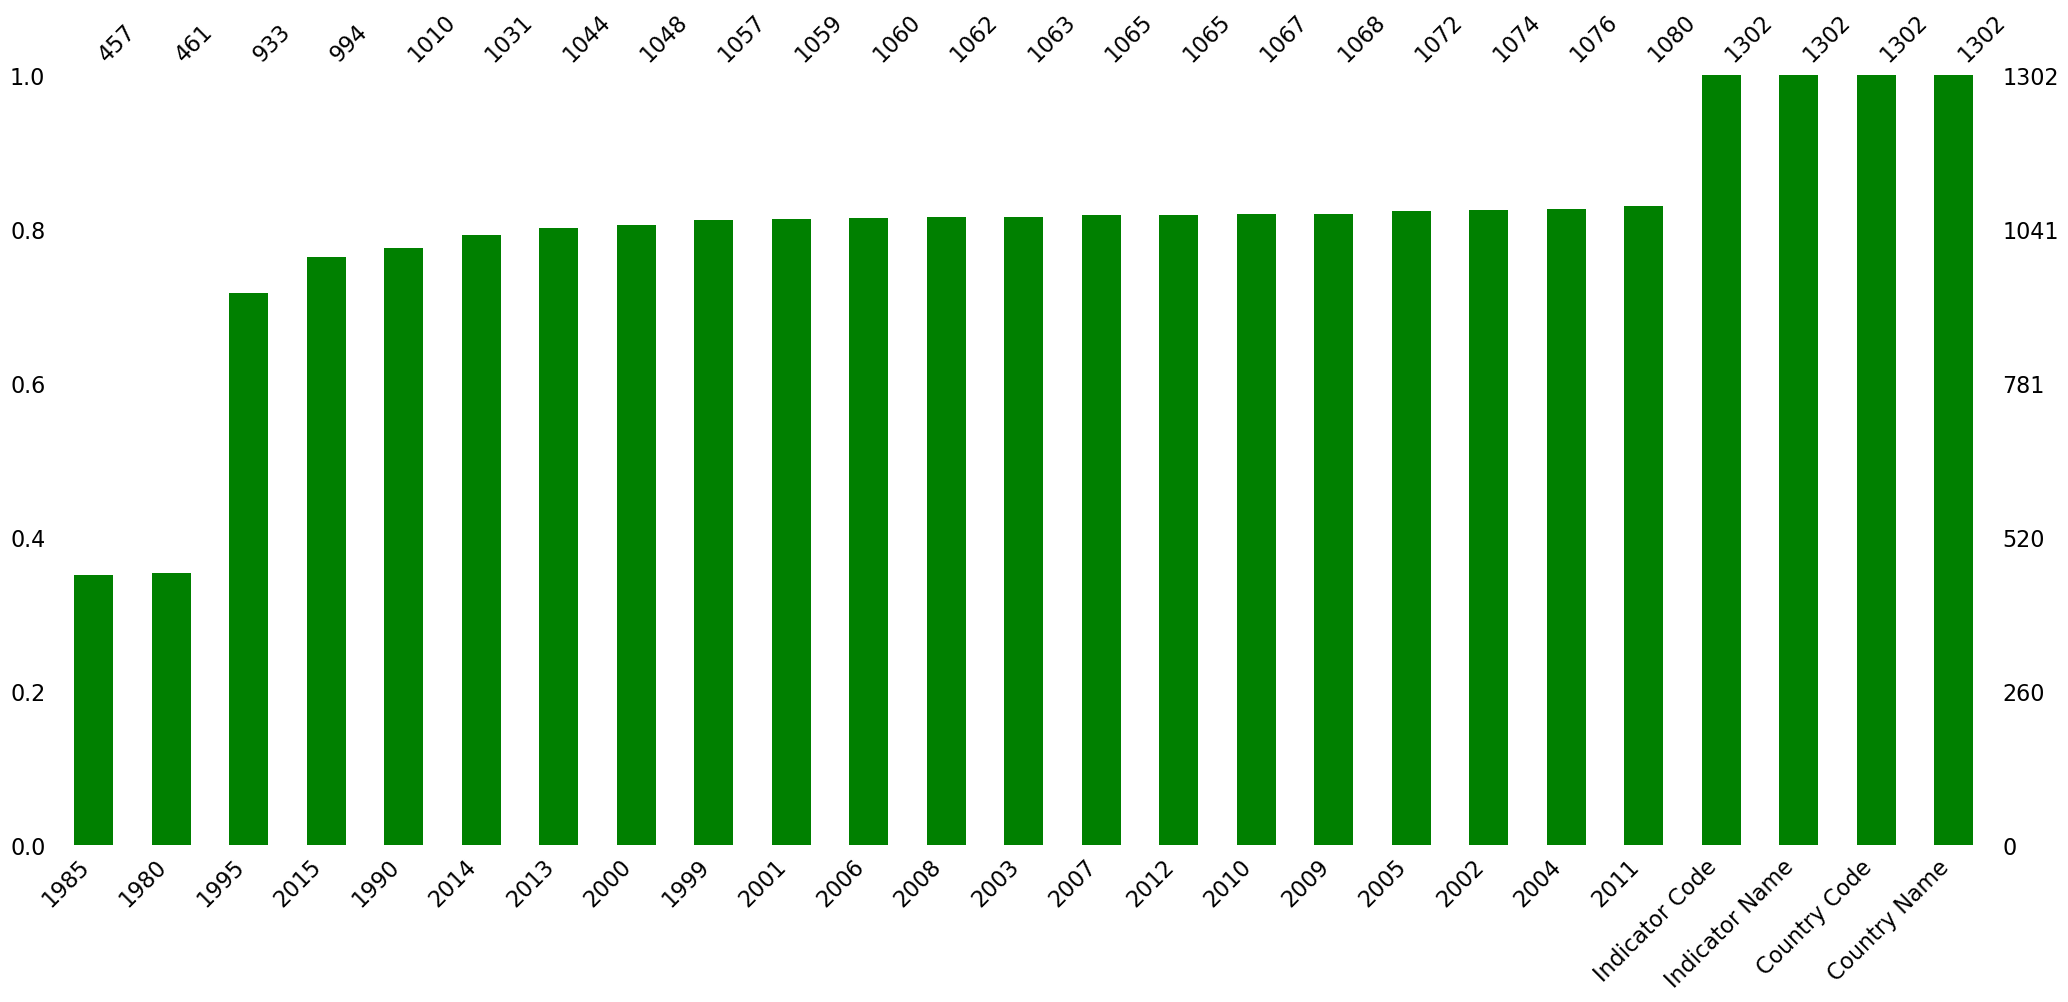

In [57]:
msno.bar(dataDInd,color="green", sort="ascending" );

In [58]:
#Création d’une nouvelle colonne avec valeur : la dernière année où la valeurs est non null

dataDInd['Nouveau']=dataDInd.loc[:, '2010': '2015'].fillna(method='ffill',axis=1)['2015']
dataDInd.head()

C:\Users\User_01\AppData\Local\Temp\ipykernel_14604\1497628543.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataDInd['Nouveau']=dataDInd.loc[:, '2010': '2015'].fillna(method='ffill',axis=1)['2015']


,Country Name,Country Code,Indicator Name,Indicator Code,1980,1985,1990,1995,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,Nouveau
92872,Afghanistan,AFG,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.755176e+02,9.228294e+02,9.163345e+02,1.011596e+03,1.065620e+03,1.210479e+03,1.247066e+03,1.482099e+03,1.581601e+03,1.660740e+03,1.873154e+03,1.877412e+03,1.875447e+03,1.864974e+03,1.864974e+03
92960,Afghanistan,AFG,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,16.942141,13.46313,1.122283e+01,2.256602e+01,NaN,NaN,1.304874e+01,NaN,1.331708e+01,1.866479e+01,1.978370e+01,2.993046e+01,3.008316e+01,4.022338e+01,4.673276e+01,5.324683e+01,5.461618e+01,5.667734e+01,5.668866e+01,5.565616e+01,5.564441e+01,5.564441e+01
92964,Afghanistan,AFG,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,NaN,NaN,2.273170e+00,NaN,NaN,NaN,NaN,NaN,1.256840e+00,1.256030e+00,NaN,NaN,NaN,NaN,3.903390e+00,NaN,3.755980e+00,NaN,NaN,8.662800e+00,NaN,8.662800e+00
93000,Afghanistan,AFG,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,0.000000e+00,NaN,NaN,NaN,4.722568e-03,4.561395e-03,8.789125e-02,1.058090e-01,1.224148e+00,2.107124e+00,1.900000e+00,1.840000e+00,3.550000e+00,4.000000e+00,5.000000e+00,5.454545e+00,5.900000e+00,7.000000e+00,8.260000e+00,8.260000e+00
94107,Afghanistan,AFG,"Population, ages 15-24, total",SP.POP.1524.TO.UN,NaN,NaN,2.423555e+06,3.483752e+06,3870496.0,3979438.0,4.122669e+06,4.293057e+06,4.486256e+06,4.694142e+06,4.910340e+06,5.134377e+06,5.367499e+06,5.606736e+06,5.848604e+06,6.090239e+06,6.330684e+06,6.569239e+06,6.803785e+06,7.032072e+06,7.252785e+06,7.252785e+06


In [59]:

dataDInd=dataDInd[['Country Name','Indicator Code', 'Nouveau']]
dataDInd

,Country Name,Indicator Code,Nouveau
92872,Afghanistan,NY.GDP.PCAP.PP.CD,1.864974e+03
92960,Afghanistan,SE.SEC.ENRR,5.564441e+01
92964,Afghanistan,SE.TER.ENRR,8.662800e+00
93000,Afghanistan,IT.NET.USER.P2,8.260000e+00
94107,Afghanistan,SP.POP.1524.TO.UN,7.252785e+06
94158,Afghanistan,SP.POP.TOTL,3.373649e+07
96537,Albania,NY.GDP.PCAP.PP.CD,1.144909e+04
96625,Albania,SE.SEC.ENRR,9.576549e+01
96629,Albania,SE.TER.ENRR,5.810995e+01
96665,Albania,IT.NET.USER.P2,6.325293e+01


In [60]:
dataDIndP=dataDInd.pivot_table(index= 'Country Name', columns='Indicator Code', values='Nouveau')
dataDIndP

Indicator Code,IT.NET.USER.P2,NY.GDP.PCAP.PP.CD,SE.SEC.ENRR,SE.TER.ENRR,SP.POP.1524.TO.UN,SP.POP.TOTL
Country Name,,,,,,
Afghanistan,8.260000,1864.973641,55.644409,8.662800,7252785.0,3.373649e+07
Albania,63.252933,11449.094589,95.765488,58.109951,556269.0,2.880703e+06
Algeria,38.200000,14643.343064,99.860191,36.922279,6467818.0,3.987153e+07
American Samoa,NaN,NaN,NaN,NaN,NaN,5.553700e+04
Andorra,96.910000,NaN,NaN,NaN,NaN,7.801400e+04
Angola,12.400000,6648.124016,28.898720,9.308020,4259352.0,2.785930e+07
Antigua and Barbuda,70.000000,21503.952551,102.705460,23.486240,NaN,9.992300e+04
Argentina,68.043064,20379.779854,106.777901,82.917389,6886530.0,4.341776e+07
Armenia,59.102378,8744.501489,88.502357,44.309502,446958.0,2.916950e+06


In [102]:
dataDIndP.shape

(217, 6)

In [61]:
dataDIndPF=dataDIndP.dropna()
dataDIndPF

Indicator Code,IT.NET.USER.P2,NY.GDP.PCAP.PP.CD,SE.SEC.ENRR,SE.TER.ENRR,SP.POP.1524.TO.UN,SP.POP.TOTL
Country Name,,,,,,
Afghanistan,8.260000,1864.973641,55.644409,8.662800,7252785.0,3.373649e+07
Albania,63.252933,11449.094589,95.765488,58.109951,556269.0,2.880703e+06
Algeria,38.200000,14643.343064,99.860191,36.922279,6467818.0,3.987153e+07
Angola,12.400000,6648.124016,28.898720,9.308020,4259352.0,2.785930e+07
Argentina,68.043064,20379.779854,106.777901,82.917389,6886530.0,4.341776e+07
Armenia,59.102378,8744.501489,88.502357,44.309502,446958.0,2.916950e+06
Aruba,88.661227,35973.780510,111.174522,15.273780,14455.0,1.043410e+05
Australia,84.560519,46475.927752,137.564789,90.306503,2914620.0,2.378934e+07
Austria,83.940142,50087.731743,100.021889,81.540512,964629.0,8.633169e+06


In [62]:
dataDIndPF.shape

(142, 6)

## Calcul du score

In [63]:
# Score: z = (x – μ)/σ => μ=la moyenne, σ= l’écart-type des pays
def scoreN(x): 
    return (dataDIndPF[x]-dataDIndPF[x].mean())/dataDIndPF[x].std()

dataDIndPF['Score IT.NET.USER.P2']=scoreN('IT.NET.USER.P2')
dataDIndPF['Score NY.GDP.PCAP.PP.CD']=scoreN('NY.GDP.PCAP.PP.CD')
dataDIndPF['Score SE.SEC.ENRR']=scoreN('SE.SEC.ENRR')
dataDIndPF['Score SE.TER.ENRR']=scoreN('SE.TER.ENRR')
dataDIndPF['Score SP.POP.1524.TO.UN']=scoreN('SP.POP.1524.TO.UN')
dataDIndPF['Score SP.POP.TOTL']=scoreN('SP.POP.TOTL')
dataDIndPF['Score TOT']= dataDIndPF.sum(axis=1)
dataDIndPF



C:\Users\User_01\AppData\Local\Temp\ipykernel_14604\2263671962.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataDIndPF['Score IT.NET.USER.P2']=scoreN('IT.NET.USER.P2')
C:\Users\User_01\AppData\Local\Temp\ipykernel_14604\2263671962.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataDIndPF['Score NY.GDP.PCAP.PP.CD']=scoreN('NY.GDP.PCAP.PP.CD')
C:\Users\User_01\AppData\Local\Temp\ipykernel_14604\2263671962.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

Indicator Code,IT.NET.USER.P2,NY.GDP.PCAP.PP.CD,SE.SEC.ENRR,SE.TER.ENRR,SP.POP.1524.TO.UN,SP.POP.TOTL,Score IT.NET.USER.P2,Score NY.GDP.PCAP.PP.CD,Score SE.SEC.ENRR,Score SE.TER.ENRR,Score SP.POP.1524.TO.UN,Score SP.POP.TOTL,Score TOT
Country Name,,,,,,,,,,,,,
Afghanistan,8.260000,1864.973641,55.644409,8.662800,7252785.0,3.373649e+07,-1.395456,-0.827170,-0.941558,-1.074883,-0.024998,-0.089553,4.099121e+07
Albania,63.252933,11449.094589,95.765488,58.109951,556269.0,2.880703e+06,0.512176,-0.401961,0.394427,0.633086,-0.273285,-0.279057,3.448639e+06
Algeria,38.200000,14643.343064,99.860191,36.922279,6467818.0,3.987153e+07,-0.356877,-0.260246,0.530776,-0.098764,-0.054102,-0.051874,4.635416e+07
Angola,12.400000,6648.124016,28.898720,9.308020,4259352.0,2.785930e+07,-1.251845,-0.614961,-1.832159,-1.052597,-0.135986,-0.125648,3.212535e+07
Argentina,68.043064,20379.779854,106.777901,82.917389,6886530.0,4.341776e+07,0.678339,-0.005743,0.761128,1.489968,-0.038578,-0.030095,5.032494e+07
Armenia,59.102378,8744.501489,88.502357,44.309502,446958.0,2.916950e+06,0.368198,-0.521953,0.152573,0.156401,-0.277338,-0.278834,3.372844e+06
Aruba,88.661227,35973.780510,111.174522,15.273780,14455.0,1.043410e+05,1.393555,0.686100,0.907530,-0.846531,-0.293374,-0.296108,1.549864e+05
Australia,84.560519,46475.927752,137.564789,90.306503,2914620.0,2.378934e+07,1.251307,1.152038,1.786296,1.745197,-0.185844,-0.150644,2.675075e+07
Austria,83.940142,50087.731743,100.021889,81.540512,964629.0,8.633169e+06,1.229787,1.312279,0.536160,1.442409,-0.258144,-0.243727,9.648155e+06


In [64]:
dataDIndPF.drop(dataDIndPF[dataDIndPF['Score NY.GDP.PCAP.PP.CD'] <= 0].index, inplace = True)
dataDIndPF

C:\Users\User_01\AppData\Local\Temp\ipykernel_14604\4112054208.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataDIndPF.drop(dataDIndPF[dataDIndPF['Score NY.GDP.PCAP.PP.CD'] <= 0].index, inplace = True)


Indicator Code,IT.NET.USER.P2,NY.GDP.PCAP.PP.CD,SE.SEC.ENRR,SE.TER.ENRR,SP.POP.1524.TO.UN,SP.POP.TOTL,Score IT.NET.USER.P2,Score NY.GDP.PCAP.PP.CD,Score SE.SEC.ENRR,Score SE.TER.ENRR,Score SP.POP.1524.TO.UN,Score SP.POP.TOTL,Score TOT
Country Name,,,,,,,,,,,,,
Aruba,88.661227,35973.780510,111.174522,15.273780,14455.0,104341.0,1.393555,0.686100,0.907530,-0.846531,-0.293374,-0.296108,1.549864e+05
Australia,84.560519,46475.927752,137.564789,90.306503,2914620.0,23789338.0,1.251307,1.152038,1.786296,1.745197,-0.185844,-0.150644,2.675075e+07
Austria,83.940142,50087.731743,100.021889,81.540512,964629.0,8633169.0,1.229787,1.312279,0.536160,1.442409,-0.258144,-0.243727,9.648155e+06
Bahrain,93.478301,46866.547976,102.130898,43.263229,132609.0,1371855.0,1.560653,1.169368,0.606388,0.120261,-0.288993,-0.288323,1.551572e+06
Belgium,85.052900,45629.352069,166.808472,75.036827,1241946.0,11274196.0,1.268387,1.114479,2.760076,1.217763,-0.247862,-0.227507,1.256210e+07
Brunei Darussalam,71.200000,79593.280721,96.079468,30.844780,77348.0,417542.0,0.787849,2.621322,0.404882,-0.308689,-0.291042,-0.294184,5.746843e+05
Chile,64.289000,23579.462274,100.646187,88.577293,2817084.0,17762681.0,0.548115,0.136214,0.556949,1.685468,-0.189461,-0.187658,2.060360e+07
Croatia,69.803100,22602.188383,98.216476,69.052490,503529.0,4203604.0,0.739392,0.092856,0.476042,1.011056,-0.275240,-0.270932,4.729974e+06
Cyprus,71.715900,31539.526826,99.778313,60.101231,124493.0,1160985.0,0.805745,0.489370,0.528050,0.701868,-0.289294,-0.289619,1.317251e+06


In [65]:
dataDIndPF.drop(dataDIndPF[dataDIndPF['Score IT.NET.USER.P2'] <= 0].index, inplace = True)
dataDIndPF

C:\Users\User_01\AppData\Local\Temp\ipykernel_14604\3270328667.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataDIndPF.drop(dataDIndPF[dataDIndPF['Score IT.NET.USER.P2'] <= 0].index, inplace = True)


Indicator Code,IT.NET.USER.P2,NY.GDP.PCAP.PP.CD,SE.SEC.ENRR,SE.TER.ENRR,SP.POP.1524.TO.UN,SP.POP.TOTL,Score IT.NET.USER.P2,Score NY.GDP.PCAP.PP.CD,Score SE.SEC.ENRR,Score SE.TER.ENRR,Score SP.POP.1524.TO.UN,Score SP.POP.TOTL,Score TOT
Country Name,,,,,,,,,,,,,
Aruba,88.661227,35973.780510,111.174522,15.273780,14455.0,104341.0,1.393555,0.686100,0.907530,-0.846531,-0.293374,-0.296108,1.549864e+05
Australia,84.560519,46475.927752,137.564789,90.306503,2914620.0,23789338.0,1.251307,1.152038,1.786296,1.745197,-0.185844,-0.150644,2.675075e+07
Austria,83.940142,50087.731743,100.021889,81.540512,964629.0,8633169.0,1.229787,1.312279,0.536160,1.442409,-0.258144,-0.243727,9.648155e+06
Bahrain,93.478301,46866.547976,102.130898,43.263229,132609.0,1371855.0,1.560653,1.169368,0.606388,0.120261,-0.288993,-0.288323,1.551572e+06
Belgium,85.052900,45629.352069,166.808472,75.036827,1241946.0,11274196.0,1.268387,1.114479,2.760076,1.217763,-0.247862,-0.227507,1.256210e+07
Brunei Darussalam,71.200000,79593.280721,96.079468,30.844780,77348.0,417542.0,0.787849,2.621322,0.404882,-0.308689,-0.291042,-0.294184,5.746843e+05
Chile,64.289000,23579.462274,100.646187,88.577293,2817084.0,17762681.0,0.548115,0.136214,0.556949,1.685468,-0.189461,-0.187658,2.060360e+07
Croatia,69.803100,22602.188383,98.216476,69.052490,503529.0,4203604.0,0.739392,0.092856,0.476042,1.011056,-0.275240,-0.270932,4.729974e+06
Cyprus,71.715900,31539.526826,99.778313,60.101231,124493.0,1160985.0,0.805745,0.489370,0.528050,0.701868,-0.289294,-0.289619,1.317251e+06


In [66]:
dataDIndPF.sort_values(by='Score TOT', ascending= False)

Indicator Code,IT.NET.USER.P2,NY.GDP.PCAP.PP.CD,SE.SEC.ENRR,SE.TER.ENRR,SP.POP.1524.TO.UN,SP.POP.TOTL,Score IT.NET.USER.P2,Score NY.GDP.PCAP.PP.CD,Score SE.SEC.ENRR,Score SE.TER.ENRR,Score SP.POP.1524.TO.UN,Score SP.POP.TOTL,Score TOT
Country Name,,,,,,,,,,,,,
United States,74.554202,56469.008969,97.564690,85.795776,45147517.0,320896618.0,0.904202,1.595391,0.454339,1.589391,1.380023,1.674067,3.661009e+08
Russian Federation,73.410000,23702.844459,104.483131,80.394081,14661984.0,144096870.0,0.864511,0.141688,0.684715,1.402809,0.249712,0.588235,1.587828e+08
Japan,91.058028,40686.024386,101.745613,63.362591,12157426.0,127141000.0,1.476697,0.895163,0.593558,0.814519,0.156851,0.484099,1.393394e+08
Turkey,53.744979,24065.677860,102.488762,94.732300,13930222.0,78271472.0,0.182357,0.157786,0.618304,1.898070,0.222581,0.183963,9.222601e+07
Germany,87.589800,48170.263465,102.665398,68.265587,8682394.0,81686611.0,1.356389,1.227209,0.624186,0.983875,0.028007,0.204937,9.041744e+07
France,84.694500,41178.141819,110.644012,64.390472,7567872.0,66624068.0,1.255955,0.916997,0.889865,0.850024,-0.013316,0.112429,7.423338e+07
United Kingdom,92.000300,42124.651892,127.811287,56.476768,7731522.0,65128861.0,1.509383,0.958989,1.461515,0.576674,-0.007248,0.103246,7.290279e+07
Italy,58.141735,37407.163565,102.902458,62.496071,5703349.0,60730582.0,0.334875,0.749694,0.632080,0.784589,-0.082447,0.076234,6.647156e+07
"Korea, Rep.",89.648631,34421.579552,98.882088,93.179138,6456561.0,51014947.0,1.427807,0.617235,0.498206,1.844422,-0.054520,0.016564,5.750622e+07


In [67]:
dataDIndPF_liste1=dataDIndPF.drop(dataDIndPF.iloc[:,0:6], axis='columns')
dataDIndPF_liste1.sort_values(by='Score TOT', ascending= False)

Indicator Code,Score IT.NET.USER.P2,Score NY.GDP.PCAP.PP.CD,Score SE.SEC.ENRR,Score SE.TER.ENRR,Score SP.POP.1524.TO.UN,Score SP.POP.TOTL,Score TOT
Country Name,,,,,,,
United States,0.904202,1.595391,0.454339,1.589391,1.380023,1.674067,3.661009e+08
Russian Federation,0.864511,0.141688,0.684715,1.402809,0.249712,0.588235,1.587828e+08
Japan,1.476697,0.895163,0.593558,0.814519,0.156851,0.484099,1.393394e+08
Turkey,0.182357,0.157786,0.618304,1.898070,0.222581,0.183963,9.222601e+07
Germany,1.356389,1.227209,0.624186,0.983875,0.028007,0.204937,9.041744e+07
France,1.255955,0.916997,0.889865,0.850024,-0.013316,0.112429,7.423338e+07
United Kingdom,1.509383,0.958989,1.461515,0.576674,-0.007248,0.103246,7.290279e+07
Italy,0.334875,0.749694,0.632080,0.784589,-0.082447,0.076234,6.647156e+07
"Korea, Rep.",1.427807,0.617235,0.498206,1.844422,-0.054520,0.016564,5.750622e+07


In [68]:
dataDIndPF_liste2 = dataDIndPF_liste1.rename({ 'Score IT.NET.USER.P2': 'Num', 'Score NY.GDP.PCAP.PP.CD': 'Eco', 'Score SE.SEC.ENRR' :'Edu_sec', 'Score SE.TER.ENRR' :'Edu_ter', 'Score SP.POP.1524.TO.UN' : 'Pop_1524', 'Score SP.POP.TOTL' :'Pop_tot' }, axis=1)

dataDIndPF_liste2=dataDIndPF_liste2.sort_values(by='Score TOT', ascending= False)
dataDIndPF_liste2

Indicator Code,Num,Eco,Edu_sec,Edu_ter,Pop_1524,Pop_tot,Score TOT
Country Name,,,,,,,
United States,0.904202,1.595391,0.454339,1.589391,1.380023,1.674067,3.661009e+08
Russian Federation,0.864511,0.141688,0.684715,1.402809,0.249712,0.588235,1.587828e+08
Japan,1.476697,0.895163,0.593558,0.814519,0.156851,0.484099,1.393394e+08
Turkey,0.182357,0.157786,0.618304,1.898070,0.222581,0.183963,9.222601e+07
Germany,1.356389,1.227209,0.624186,0.983875,0.028007,0.204937,9.041744e+07
France,1.255955,0.916997,0.889865,0.850024,-0.013316,0.112429,7.423338e+07
United Kingdom,1.509383,0.958989,1.461515,0.576674,-0.007248,0.103246,7.290279e+07
Italy,0.334875,0.749694,0.632080,0.784589,-0.082447,0.076234,6.647156e+07
"Korea, Rep.",1.427807,0.617235,0.498206,1.844422,-0.054520,0.016564,5.750622e+07


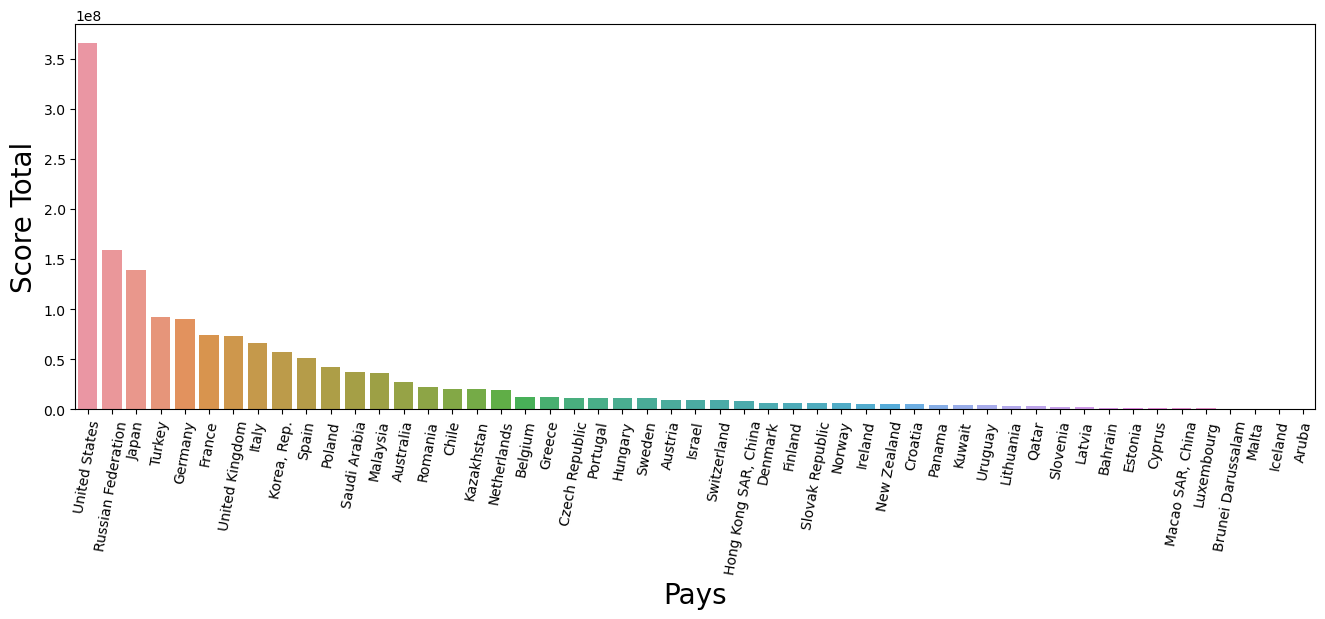

In [69]:
plt.figure(figsize=(16,5))
sns.barplot(x=dataDIndPF_liste2.index, y=dataDIndPF_liste2['Score TOT'])
plt.rcParams['font.size'] = '5'
plt.xticks(rotation=80)
plt.xlabel('Pays',fontsize=20 )
plt.ylabel('Score Total', fontsize=20);



## Top 10 des pays attractifs :

    1  United States                    
    
    2 Russian Federation
    
    3 Japan
    
    4 Turkey
    
    5 Germany
    
    6 France
    
    7 UK
    
    8 Italy
    
    9 Korea
    
    10 Spain

In [70]:
dataDIndPF_listeF= dataDIndPF_liste2.drop(dataDIndPF_liste2.index[10:])
dataDIndPF_listeF

Indicator Code,Num,Eco,Edu_sec,Edu_ter,Pop_1524,Pop_tot,Score TOT
Country Name,,,,,,,
United States,0.904202,1.595391,0.454339,1.589391,1.380023,1.674067,3.661009e+08
Russian Federation,0.864511,0.141688,0.684715,1.402809,0.249712,0.588235,1.587828e+08
Japan,1.476697,0.895163,0.593558,0.814519,0.156851,0.484099,1.393394e+08
Turkey,0.182357,0.157786,0.618304,1.898070,0.222581,0.183963,9.222601e+07
Germany,1.356389,1.227209,0.624186,0.983875,0.028007,0.204937,9.041744e+07
France,1.255955,0.916997,0.889865,0.850024,-0.013316,0.112429,7.423338e+07
United Kingdom,1.509383,0.958989,1.461515,0.576674,-0.007248,0.103246,7.290279e+07
Italy,0.334875,0.749694,0.632080,0.784589,-0.082447,0.076234,6.647156e+07
"Korea, Rep.",1.427807,0.617235,0.498206,1.844422,-0.054520,0.016564,5.750622e+07


## Etude par rapport au indicateur numerique

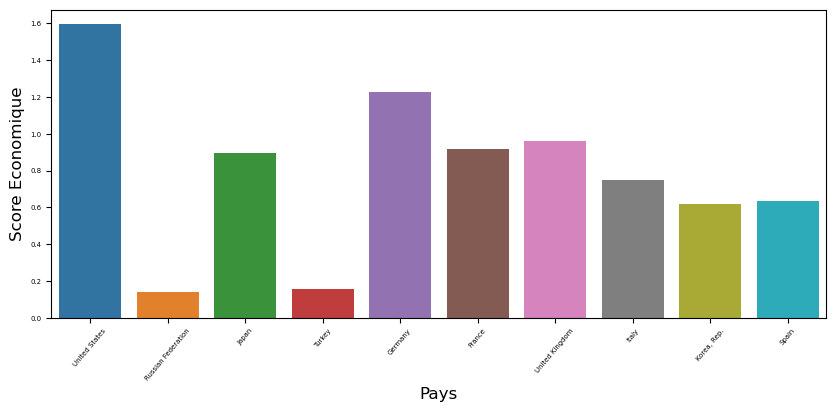

In [71]:
plt.figure(figsize=(10,4))
sns.barplot(x=dataDIndPF_listeF.index, y=dataDIndPF_listeF['Eco'])
plt.rcParams['font.size'] = '9'
plt.xticks(rotation=50)
plt.xlabel('Pays',fontsize=12 )
plt.ylabel('Score Economique', fontsize=12);

In [72]:
listEco = ['USA', 'Germany','UK', 'France',  'Japan','Italy','Spain','Korea' ,'Turkey', 'Russia'  ] 
dfEco = pd.DataFrame(listEco, columns=['classement'])
dfEco.index += 1
dfEco

,classement
1,USA
2,Germany
3,UK
4,France
5,Japan
6,Italy
7,Spain
8,Korea
9,Turkey
10,Russia


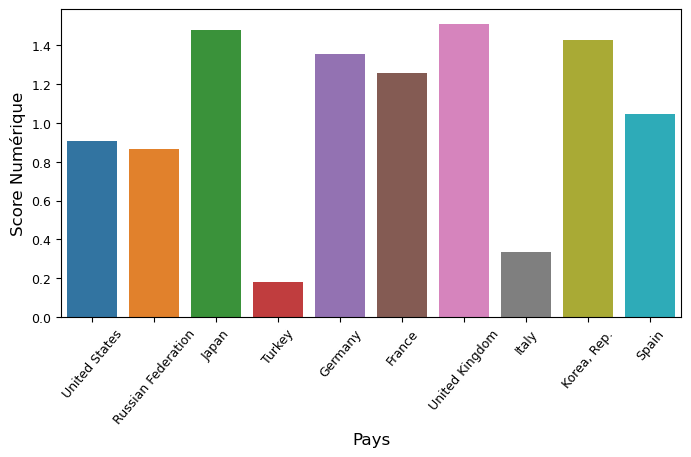

In [73]:
plt.figure(figsize=(8,4))
sns.barplot(x=dataDIndPF_listeF.index, y=dataDIndPF_listeF['Num'])
plt.rcParams['font.size'] = '9'
plt.xticks(rotation=50)
plt.xlabel('Pays',fontsize=12 )
plt.ylabel('Score Numérique', fontsize=12);

In [74]:
listNum = ['UK','Japan','Korea','Germany',  'France', 'Spain','USA', 'Russia', 'Italy', 'Turkey'] 
dfNum = pd.DataFrame(listNum, columns=['classement'])
dfNum.index += 1
dfNum

,classement
1,UK
2,Japan
3,Korea
4,Germany
5,France
6,Spain
7,USA
8,Russia
9,Italy
10,Turkey


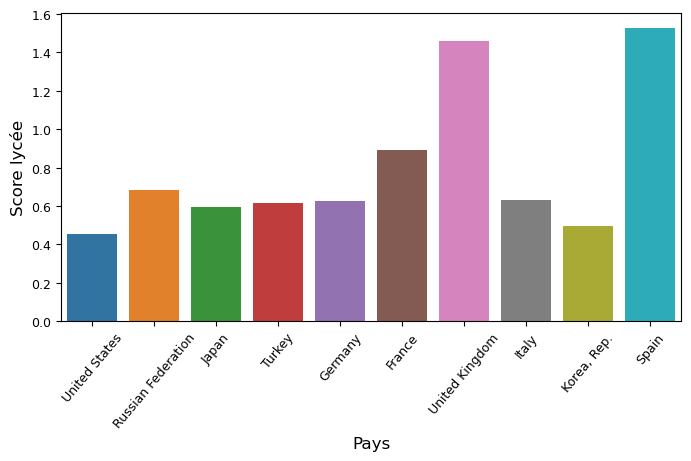

In [75]:
plt.figure(figsize=(8,4))
sns.barplot(x=dataDIndPF_listeF.index, y=dataDIndPF_listeF['Edu_sec'])
plt.rcParams['font.size'] = '9'
plt.xticks(rotation=50)
plt.xlabel('Pays',fontsize=12 )
plt.ylabel('Score lycée', fontsize=12);

In [76]:
listSec = ['Spain','UK','France', 'Russia','Germany','Italy', 'Turkey', 'Japan','Korea',   'USA'] 
dfSec = pd.DataFrame(listSec, columns=['classement'])
dfSec.index += 1
dfSec

,classement
1,Spain
2,UK
3,France
4,Russia
5,Germany
6,Italy
7,Turkey
8,Japan
9,Korea
10,USA


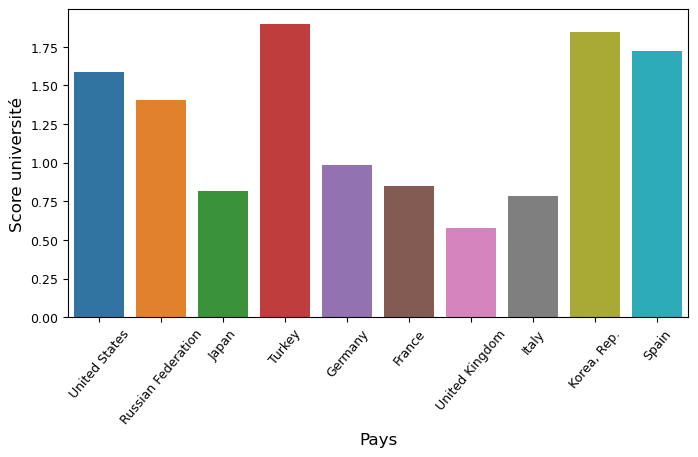

In [77]:
plt.figure(figsize=(8,4))
sns.barplot(x=dataDIndPF_listeF.index, y=dataDIndPF_listeF['Edu_ter'])
plt.rcParams['font.size'] = '9'
plt.xticks(rotation=50)
plt.xlabel('Pays',fontsize=12 )
plt.ylabel('Score université', fontsize=12);

In [78]:
listTer = ['Turkey','Korea','Spain', 'USA', 'Russia','Germany','France','Japan',  'Italy','UK'] 
dfTer = pd.DataFrame(listTer, columns=['classement'])
dfTer.index += 1
dfTer

,classement
1,Turkey
2,Korea
3,Spain
4,USA
5,Russia
6,Germany
7,France
8,Japan
9,Italy
10,UK


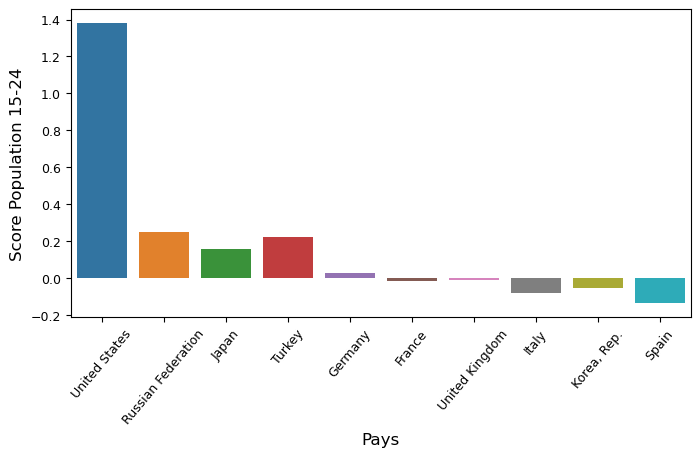

In [79]:
plt.figure(figsize=(8,4))
sns.barplot(x=dataDIndPF_listeF.index, y=dataDIndPF_listeF['Pop_1524'])
plt.rcParams['font.size'] = '9'
plt.xticks(rotation=50)
plt.xlabel('Pays',fontsize=12 )
plt.ylabel('Score Population 15-24', fontsize=12);

In [80]:
listPo1524 = ['USA','Turkey','Russia', 'Japan','Germany', 'France','UK', 'korea','Italy','Spain'] 
dfPo1524 = pd.DataFrame(listPo1524, columns=['classement'])
dfPo1524.index += 1
dfPo1524

,classement
1,USA
2,Turkey
3,Russia
4,Japan
5,Germany
6,France
7,UK
8,korea
9,Italy
10,Spain


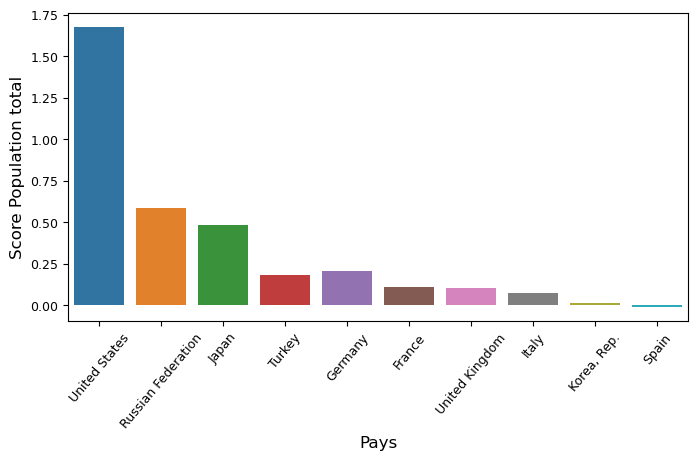

In [81]:
plt.figure(figsize=(8,4))
sns.barplot(x=dataDIndPF_listeF.index, y=dataDIndPF_listeF['Pop_tot'])
plt.rcParams['font.size'] = '9'
plt.xticks(rotation=50)
plt.xlabel('Pays',fontsize=12 )
plt.ylabel('Score Population total', fontsize=12);

In [82]:
listPopT = ['USA','Russia','Japan','Germany','Turkey', 'France','UK', 'Italy','korea','Spain'] 
dfPopT = pd.DataFrame(listPopT, columns=['classement'])
dfPopT.index += 1
dfPopT

,classement
1,USA
2,Russia
3,Japan
4,Germany
5,Turkey
6,France
7,UK
8,Italy
9,korea
10,Spain


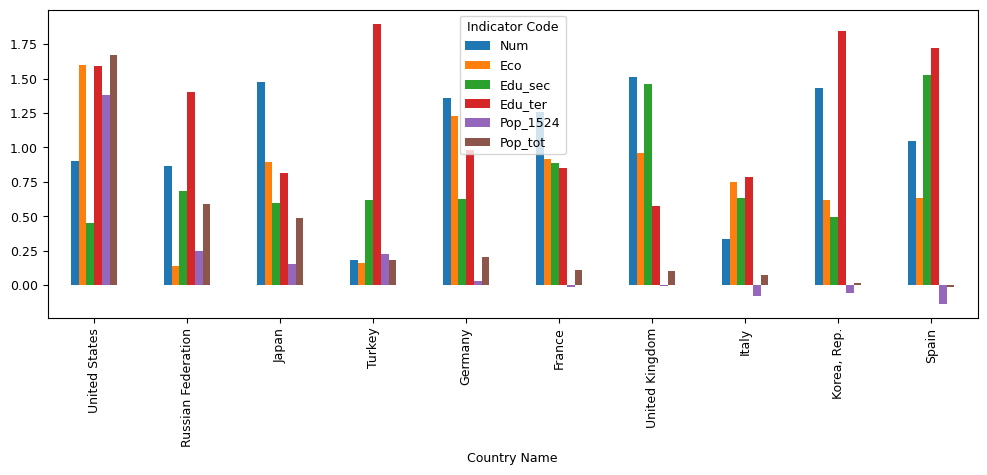

In [83]:
dataDIndPF_listeF.drop('Score TOT', axis=1).plot.bar(figsize=(12,4), fontsize='9');

L'analyse des 6 indicateurs (Economique, numérique, Education secondaire, Education universitaire, population 14-25 ans et la population totale) nous permet de considérer que les pays avec un fort potentiel de clients pour ces services sont :

United States,Russia,Japan,Turkey et Germany.

In [84]:
dataEvol=data.copy()

In [85]:
dataEvol=dataEvol[['Country Name', 'Indicator Code','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009', '2010','2011', '2013','2014','2015']]
dataEvol

In [118]:
dataEvol=dataEvol.apply(lambda row: row[dataEvol['Country Name'].isin(['Japan','Germany','Russian Federation','United States','Turkey'])])

In [119]:
dataEvol=dataEvol.apply(lambda row: row[dataEvol['Indicator Code'].isin(['SP.POP.1524.TO.UN','SE.SEC.ENRR', 'SE.TER.ENRR', 'IT.NET.USER.P2','NY.GNP.PCAP.PP.CD','SP.POP.TOTL'])])
dataEvol

,Country Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2013,2014,2015
356757,Germany,NY.GNP.PCAP.PP.CD,2.710000e+04,2.830000e+04,2.898000e+04,2.972000e+04,3.166000e+04,3.225000e+04,3.485000e+04,3.697000e+04,3.840000e+04,3.791000e+04,4.004000e+04,4.377000e+04,4.625000e+04,4.813000e+04,4.906000e+04
356840,Germany,SE.SEC.ENRR,9.984454e+01,1.006418e+02,1.016412e+02,1.020321e+02,1.023895e+02,1.025061e+02,1.031979e+02,1.025108e+02,1.035866e+02,1.033262e+02,1.039837e+02,1.036433e+02,1.024777e+02,1.024299e+02,1.026654e+02
356844,Germany,SE.TER.ENRR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.105642e+01,6.547380e+01,6.826559e+01
356880,Germany,IT.NET.USER.P2,3.021635e+01,3.165094e+01,4.882000e+01,5.590000e+01,6.473000e+01,6.871000e+01,7.216000e+01,7.516000e+01,7.800000e+01,7.900000e+01,8.200000e+01,8.127000e+01,8.417000e+01,8.619000e+01,8.758980e+01
357987,Germany,SP.POP.1524.TO.UN,9.162837e+06,9.279469e+06,9.423919e+06,9.571462e+06,9.691148e+06,9.760730e+06,9.769678e+06,9.722427e+06,9.630837e+06,9.514498e+06,9.388651e+06,9.255162e+06,8.964066e+06,8.819364e+06,8.682394e+06
358038,Germany,SP.POP.TOTL,8.221151e+07,8.234992e+07,8.248850e+07,8.253418e+07,8.251626e+07,8.246942e+07,8.237645e+07,8.226637e+07,8.211010e+07,8.190231e+07,8.177693e+07,8.027498e+07,8.064560e+07,8.098250e+07,8.168661e+07
448382,Japan,NY.GNP.PCAP.PP.CD,2.718000e+04,2.790000e+04,2.856000e+04,2.932000e+04,3.095000e+04,3.235000e+04,3.392000e+04,3.557000e+04,3.571000e+04,3.391000e+04,3.590000e+04,3.679000e+04,4.028000e+04,4.081000e+04,4.223000e+04
448465,Japan,SE.SEC.ENRR,1.018341e+02,1.025309e+02,1.026753e+02,1.019482e+02,1.012453e+02,1.009985e+02,1.009808e+02,1.004191e+02,1.006430e+02,1.009266e+02,1.016095e+02,1.017654e+02,1.019200e+02,1.017456e+02,NaN
448469,Japan,SE.TER.ENRR,4.873653e+01,4.991419e+01,5.070753e+01,5.183578e+01,5.357676e+01,5.497097e+01,5.710590e+01,5.781535e+01,5.763907e+01,5.767834e+01,5.807524e+01,5.992399e+01,6.241163e+01,6.336259e+01,NaN
448505,Japan,IT.NET.USER.P2,2.999074e+01,3.853206e+01,4.659420e+01,4.843527e+01,6.239393e+01,6.692107e+01,6.868527e+01,7.430000e+01,7.540000e+01,7.800000e+01,7.821000e+01,7.905411e+01,8.821943e+01,8.910683e+01,9.105803e+01


In [120]:
df = pd.melt(dataEvol, id_vars =['Country Name', 'Indicator Code'], value_vars =['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009', '2010','2011','2013','2014','2015'])
df.head()

,Country Name,Indicator Code,variable,value
0,Germany,NY.GNP.PCAP.PP.CD,2000,2.710000e+04
1,Germany,SE.SEC.ENRR,2000,9.984454e+01
2,Germany,SE.TER.ENRR,2000,NaN
3,Germany,IT.NET.USER.P2,2000,3.021635e+01
4,Germany,SP.POP.1524.TO.UN,2000,9.162837e+06


## Evolution de l'indicateur économique

In [121]:
dfEco=df[df['Indicator Code' ]=='NY.GNP.PCAP.PP.CD']

dfEco

,Country Name,Indicator Code,variable,value
0,Germany,NY.GNP.PCAP.PP.CD,2000,27100.0
6,Japan,NY.GNP.PCAP.PP.CD,2000,27180.0
12,Russian Federation,NY.GNP.PCAP.PP.CD,2000,6650.0
18,Turkey,NY.GNP.PCAP.PP.CD,2000,9440.0
24,United States,NY.GNP.PCAP.PP.CD,2000,36930.0
30,Germany,NY.GNP.PCAP.PP.CD,2001,28300.0
36,Japan,NY.GNP.PCAP.PP.CD,2001,27900.0
42,Russian Federation,NY.GNP.PCAP.PP.CD,2001,7270.0
48,Turkey,NY.GNP.PCAP.PP.CD,2001,9010.0
54,United States,NY.GNP.PCAP.PP.CD,2001,37860.0


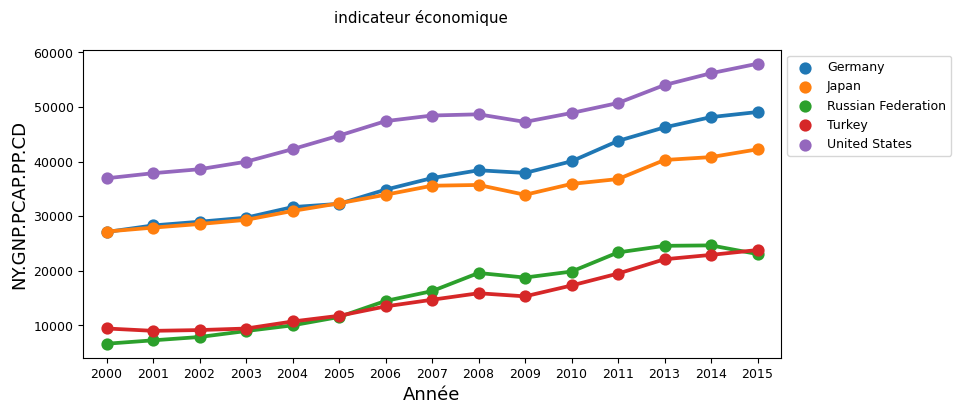

In [124]:
plt.figure(figsize=(9,4))
gfg=sns.pointplot(x='variable', y='value',hue='Country Name' ,data=dfEco )
gfg.legend(bbox_to_anchor= (1,1))
plt.xlabel('Année', fontsize= 13)
plt.ylabel('NY.GNP.PCAP.PP.CD', fontsize= 13)
plt.suptitle('indicateur économique');

L'indicateur économique'NY.GNP.PCAP.PP.CD' présente une evolution croissante pour les tous les pays à l'exception de la Russie et la turquie, la Russie montre une léger diminution à partir de l'année 2014.

Les états Unis à une evolution importante par rapport au autre pays

## Evolution de l'indicateur numérique

In [125]:
dfNum=df[df['Indicator Code' ]=='IT.NET.USER.P2']

dfNum

,Country Name,Indicator Code,variable,value
3,Germany,IT.NET.USER.P2,2000,30.216347
9,Japan,IT.NET.USER.P2,2000,29.990740
15,Russian Federation,IT.NET.USER.P2,2000,1.977230
21,Turkey,IT.NET.USER.P2,2000,3.761685
27,United States,IT.NET.USER.P2,2000,43.079163
33,Germany,IT.NET.USER.P2,2001,31.650939
39,Japan,IT.NET.USER.P2,2001,38.532061
45,Russian Federation,IT.NET.USER.P2,2001,2.944368
51,Turkey,IT.NET.USER.P2,2001,5.189481
57,United States,IT.NET.USER.P2,2001,49.080832


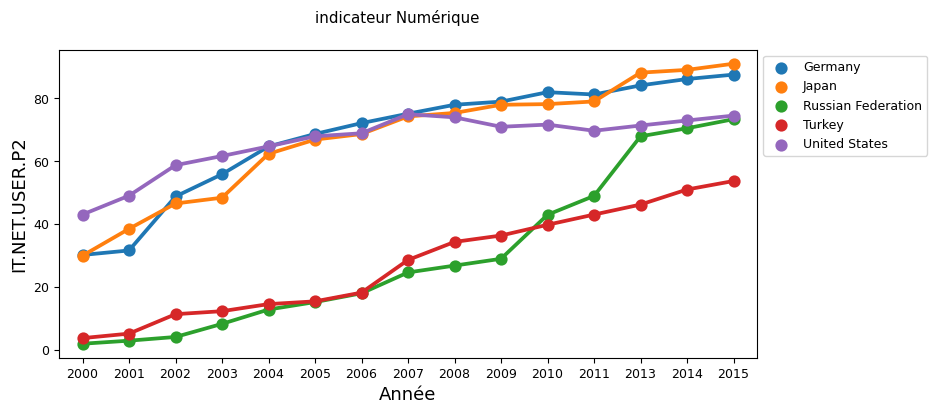

In [126]:
plt.figure(figsize=(9,4))
gfg=sns.pointplot(x='variable', y='value',hue='Country Name' ,data=dfNum )
plt.xlabel('Année', fontsize= 13)
gfg.legend(bbox_to_anchor= (1,1))
plt.ylabel('IT.NET.USER.P2', fontsize= 13)
plt.suptitle('indicateur Numérique');

l'indicateur numérique 'IT.NET.USER.P2' presente une evolution croissante pour tous les pays.

## Evolution de l'indicateur éducation Secondaire

In [127]:
dfSec=df[df['Indicator Code' ]=='SE.SEC.ENRR']

dfSec

,Country Name,Indicator Code,variable,value
1,Germany,SE.SEC.ENRR,2000,99.844543
7,Japan,SE.SEC.ENRR,2000,101.834099
13,Russian Federation,SE.SEC.ENRR,2000,NaN
19,Turkey,SE.SEC.ENRR,2000,72.723259
25,United States,SE.SEC.ENRR,2000,93.172043
31,Germany,SE.SEC.ENRR,2001,100.641830
37,Japan,SE.SEC.ENRR,2001,102.530861
43,Russian Federation,SE.SEC.ENRR,2001,NaN
49,Turkey,SE.SEC.ENRR,2001,82.862968
55,United States,SE.SEC.ENRR,2001,93.950508


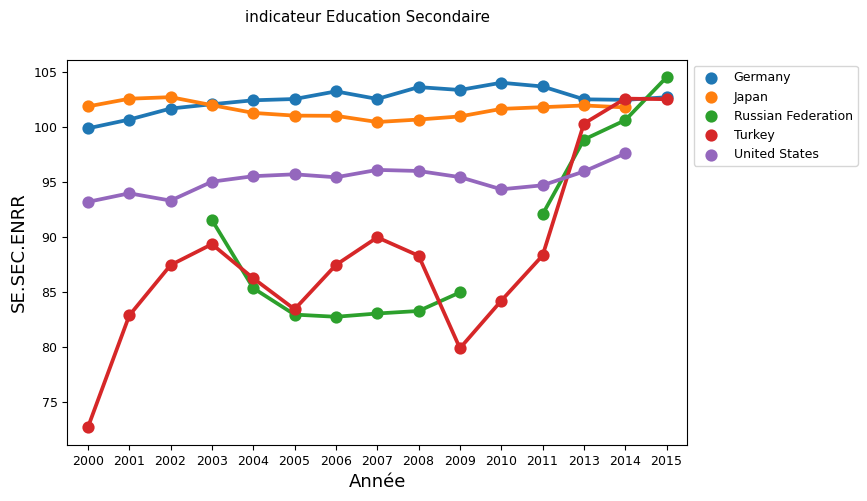

In [130]:
plt.figure(figsize=(8,5))
gfg=sns.pointplot(x='variable', y='value',hue='Country Name' ,data=dfSec )
gfg.legend(bbox_to_anchor= (1,1))
plt.xlabel('Année', fontsize= 13)
plt.ylabel('SE.SEC.ENRR', fontsize= 13)
plt.suptitle('indicateur Education Secondaire');

On remarque une croissance forte pour la Turquie à partir de 2009 et une  stabilité pour le reste des pays.


## Evolution de l'indicateur éducation Universitaire

In [131]:
dfTer=df[df['Indicator Code' ]=='SE.TER.ENRR']
dfTer

,Country Name,Indicator Code,variable,value
2,Germany,SE.TER.ENRR,2000,NaN
8,Japan,SE.TER.ENRR,2000,48.736530
14,Russian Federation,SE.TER.ENRR,2000,55.776749
20,Turkey,SE.TER.ENRR,2000,NaN
26,United States,SE.TER.ENRR,2000,68.136307
32,Germany,SE.TER.ENRR,2001,NaN
38,Japan,SE.TER.ENRR,2001,49.914188
44,Russian Federation,SE.TER.ENRR,2001,61.560532
50,Turkey,SE.TER.ENRR,2001,25.260731
56,United States,SE.TER.ENRR,2001,68.980133


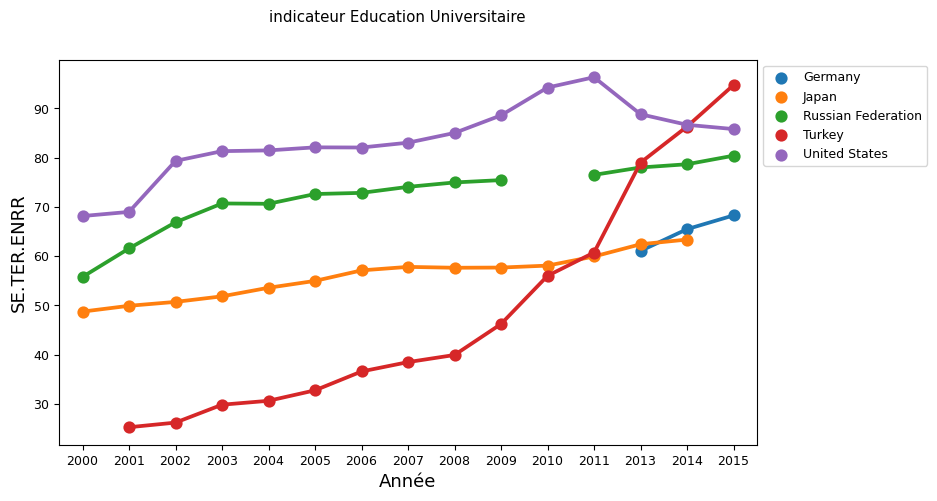

In [133]:
plt.figure(figsize=(9,5))
gfg=sns.pointplot(x='variable', y='value',hue='Country Name' ,data=dfTer )
gfg.legend(bbox_to_anchor= (1,1))
plt.xlabel('Année', fontsize= 13)
plt.ylabel('SE.TER.ENRR', fontsize= 13)
plt.suptitle('indicateur Education Universitaire');

On remarque :
une evolution croissante  pour la Turquie à partir du 2011
une diminution à partir de l'année 2011 pour Les états Unis.

## Evolution de l'indicateur Population 15-24

In [134]:
dfPop1524=df[df['Indicator Code' ]=='SP.POP.1524.TO.UN']

dfPop1524

,Country Name,Indicator Code,variable,value
4,Germany,SP.POP.1524.TO.UN,2000,9162837.0
10,Japan,SP.POP.1524.TO.UN,2000,16099722.0
16,Russian Federation,SP.POP.1524.TO.UN,2000,23392286.0
22,Turkey,SP.POP.1524.TO.UN,2000,13609836.0
28,United States,SP.POP.1524.TO.UN,2000,39234056.0
34,Germany,SP.POP.1524.TO.UN,2001,9279469.0
40,Japan,SP.POP.1524.TO.UN,2001,15642234.0
46,Russian Federation,SP.POP.1524.TO.UN,2001,23828843.0
52,Turkey,SP.POP.1524.TO.UN,2001,13650417.0
58,United States,SP.POP.1524.TO.UN,2001,39908939.0


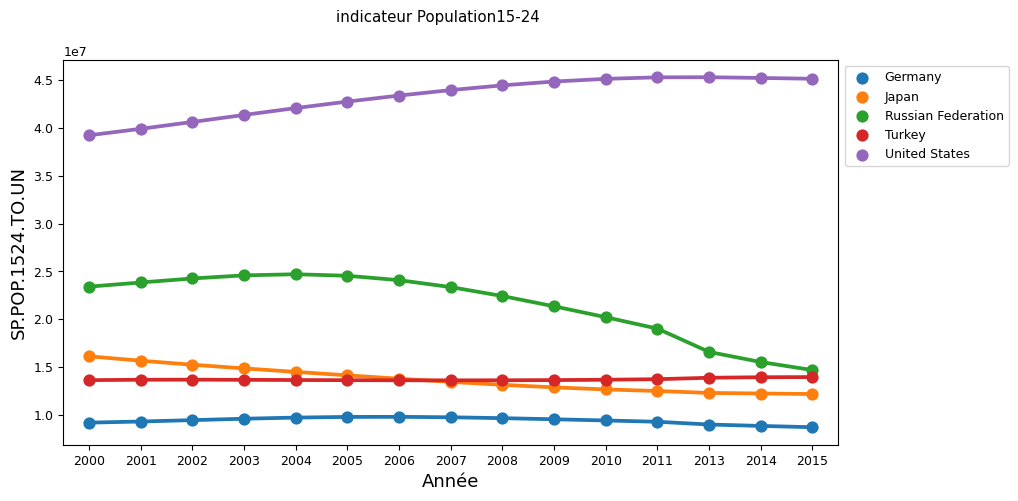

In [135]:
plt.figure(figsize=(10,5))
gfg=sns.pointplot(x='variable', y='value',hue='Country Name' ,data=dfPop1524 )
gfg.legend(bbox_to_anchor= (1,1))
plt.xlabel('Année', fontsize= 13)
plt.ylabel('SP.POP.1524.TO.UN', fontsize= 13)
plt.suptitle('indicateur Population15-24');

on remarque:

    -Une evolution presque stable pour la majorité des pays
    -Les états Unis à une evolution importante par rapport au autre pays
    -Une evolution décroissante pour la Russie à partir de l'année 2005

## Evolution de l'indicateur Population Totale

In [136]:
dfPopT=df[df['Indicator Code' ]=='SP.POP.TOTL']
dfPopT

,Country Name,Indicator Code,variable,value
5,Germany,SP.POP.TOTL,2000,82211508.0
11,Japan,SP.POP.TOTL,2000,126843000.0
17,Russian Federation,SP.POP.TOTL,2000,146596557.0
23,Turkey,SP.POP.TOTL,2000,63240121.0
29,United States,SP.POP.TOTL,2000,282162411.0
35,Germany,SP.POP.TOTL,2001,82349925.0
41,Japan,SP.POP.TOTL,2001,127149000.0
47,Russian Federation,SP.POP.TOTL,2001,145976083.0
53,Turkey,SP.POP.TOTL,2001,64191474.0
59,United States,SP.POP.TOTL,2001,284968955.0


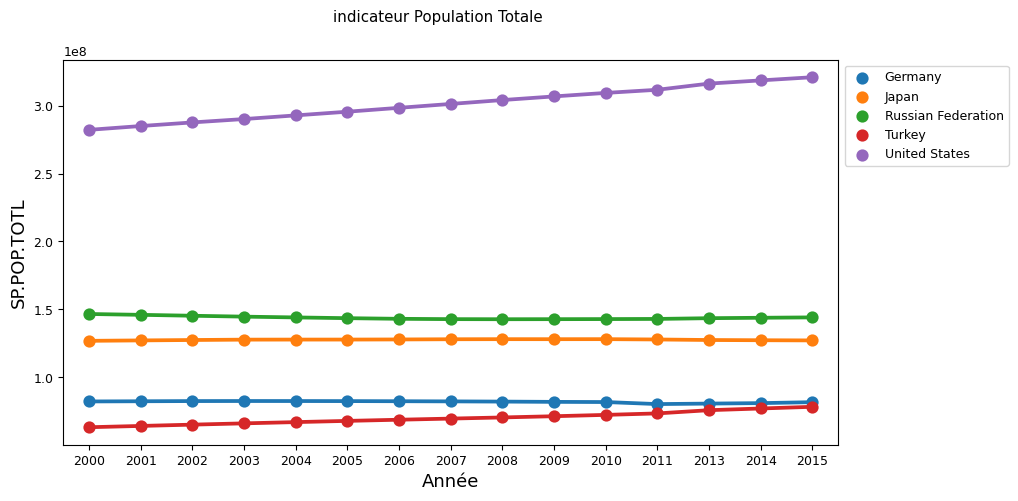

In [137]:
plt.figure(figsize=(10,5))
gfg=sns.pointplot(x='variable', y='value',hue='Country Name' ,data=dfPopT )
gfg.legend(bbox_to_anchor= (1,1))
plt.xlabel('Année', fontsize= 13)
plt.ylabel('SP.POP.TOTL', fontsize= 13)
plt.suptitle('indicateur Population Totale');

Tous les pays ont une évolution presque stable sauf pour les Etats Unis on remarque une augmentation chaque année.